In [1]:
import setup

In [2]:
import qiskit
import matplotlib
import matplotlib.pyplot as plt
from circuit import QCircuit
from algo.func_optimizer import BfgsOptimizer, CmaesOptimizer
from algo.one_plus_lambda import OnePlusLambda, EvolutionReport, IterationReport
from iohelper import hamiltonians, results as rio
from circuit import QCircuit, GateTypes, QCircuitConversions
from algo.vqe import Vqe
from mutations import Weighted, Insert, Remove, add_two_block_layers

In [5]:
def run(task):
    # Show information about task
    print('Minimal eigenvalue is  {}'.format(task.min_eigenvalue))
    print('Initial state is {}'.format(task.classical_psi0_bitstring))

    # Initialize circuit 
    circuit = QCircuit(task.N, task.classical_psi0, [])
    add_two_block_layers(circuit, GateTypes.block_cnot)


    def on_iteration_end(report: IterationReport):
        num_evaluations = sum(m.num_circ_evaluations for m in report.mutations)
        print('Iteration #{} is finished, {} circuit evaluations performed'.format(report.index, num_evaluations))
        print('  Values: {}!'.format(', '.join(str(m.value) for m in report.mutations)))
        if report.better:
            best_mutation = report.mutations[0]
            print('  New value: {}!'.format(best_mutation.value))
            circ = best_mutation.circ
            display(QCircuitConversions.to_qiskit_circuit(circ).draw(output='mpl'))


    # Run evolutional algorithm
    ev = OnePlusLambda(
        target=task.min_eigenvalue,
        vqe=Vqe(hamiltonian=task.H, optimizer=CmaesOptimizer(0.0016)),
        mutation=Weighted([
            (Insert(GateTypes.block_cnot), 2),
            (Insert(GateTypes.block_sqrtswap), 2),
            (Remove(), 1)
        ]),
        initial=circuit,
        target_eps=0.0016,
        alambda=4
    )
    report: EvolutionReport = ev.run(iteration_end_callback=on_iteration_end)

    # Show results
    if report.interrupted:
        print('INTERRUPTED')

    print('Best value is: ' + str(report.best_circuit_value))
    print('Number of iterations is: ' + str(len(report.iterations) - 1))
    display(QCircuitConversions.to_qiskit_circuit(report.best_circuit).draw(output='mpl'))
    return report


# Possible values are: h2(0.3 ... 2.5), q2, q4, q8
task = hamiltonians.h2('2.5')
#run(task)

=== H2 ===
Minimal eigenvalue is  -1.1449602744086185
Initial state is 10
Initial value: -1.1449600391525596
Best value is: -1.1449600391525596
Number of iterations is: 0


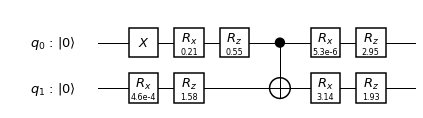

=== LiH ===
Minimal eigenvalue is  -0.8849023120519192
Initial state is 1100
Initial value: -0.8662637526714908
Iteration #1 is finished, 9538 circuit evaluations performed
  Values: -0.867007319366823, -0.8661752434328098, -0.86121331205039, -0.8577234107034205!
  New value: -0.867007319366823!


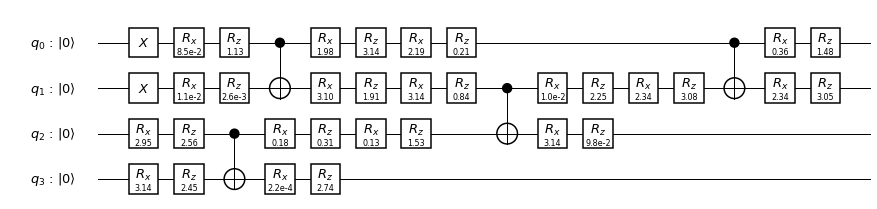

Iteration #2 is finished, 12854 circuit evaluations performed
  Values: -0.8671470918646684, -0.8660028886969783, -0.8656460941189457, -0.8640519904868867!
  New value: -0.8671470918646684!


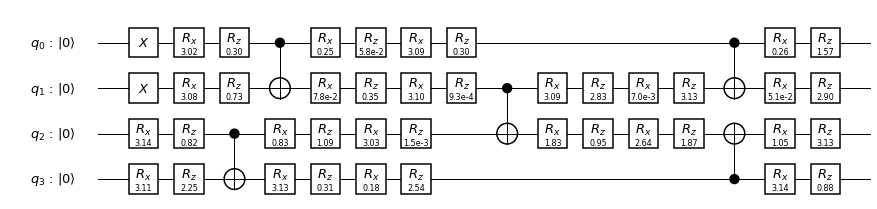

Iteration #3 is finished, 21689 circuit evaluations performed
  Values: -0.871419127825321, -0.8713159906001209, -0.8677145832484974, -0.8661037805802694!
  New value: -0.871419127825321!


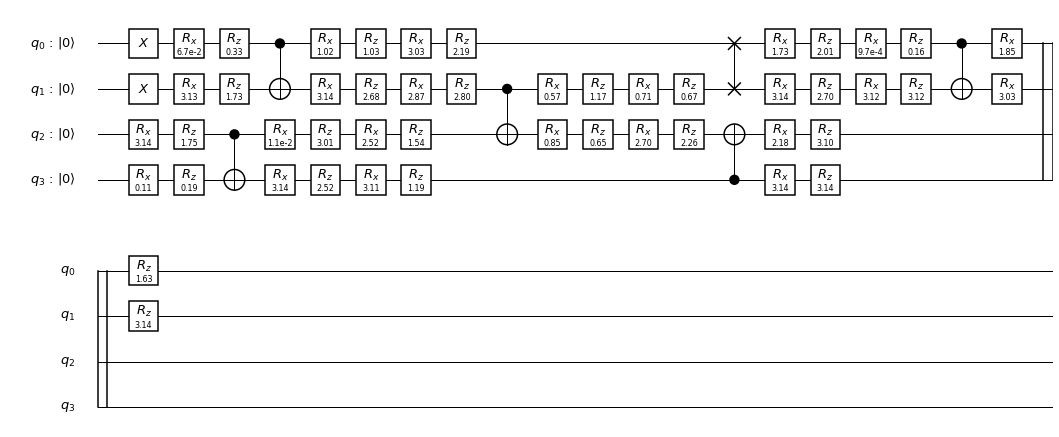

Iteration #4 is finished, 31763 circuit evaluations performed
  Values: -0.878199511506298, -0.8733261869093256, -0.8721233773321287, -0.8720545902048976!
  New value: -0.878199511506298!


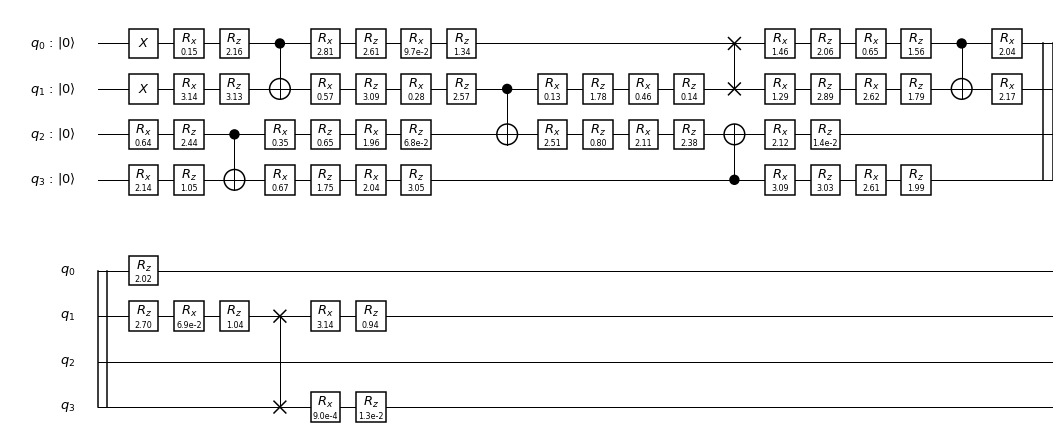

Iteration #5 is finished, 42096 circuit evaluations performed
  Values: -0.8815358852549179, -0.8810301367486436, -0.8757543369873666, -0.8712547405215089!
  New value: -0.8815358852549179!


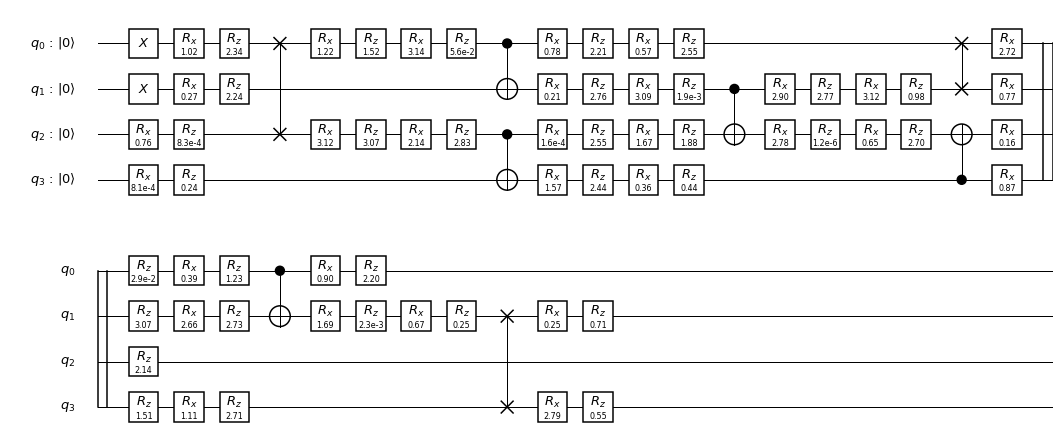

Iteration #6 is finished, 48320 circuit evaluations performed
  Values: -0.8847755205666645, -0.8835498986934187, -0.8779717209357486, -0.8777671297778639!
  New value: -0.8847755205666645!


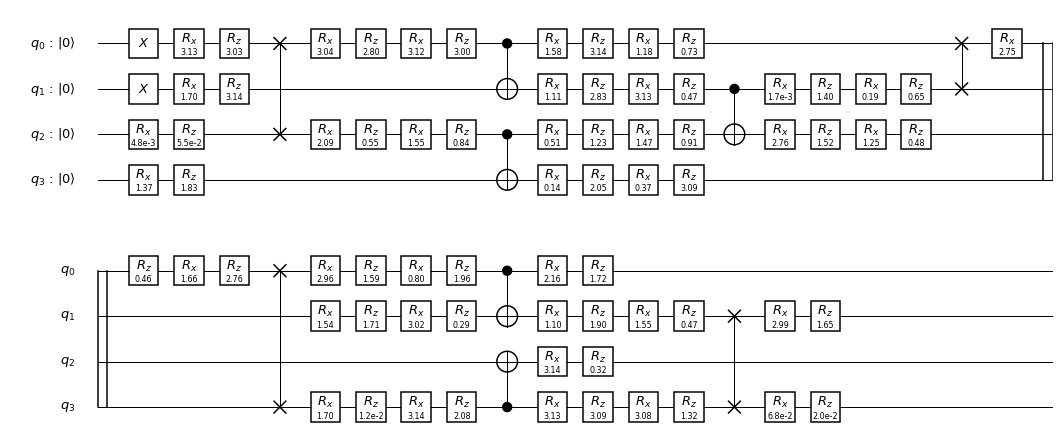

Best value is: -0.8847755205666645
Number of iterations is: 6


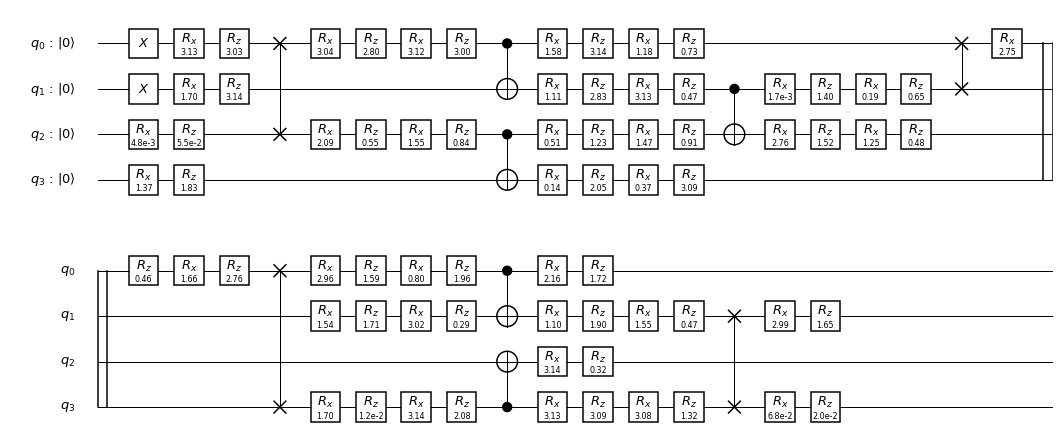

=== h2_0.5 ===
Minimal eigenvalue is  -1.05515979649662
Initial state is 1100
Initial value: -1.0429057159249109
Iteration #1 is finished, 9928 circuit evaluations performed
  Values: -1.0551573959036142, -1.0429961054853905, -1.0429847502744625, -1.0429593967812467!
  New value: -1.0551573959036142!


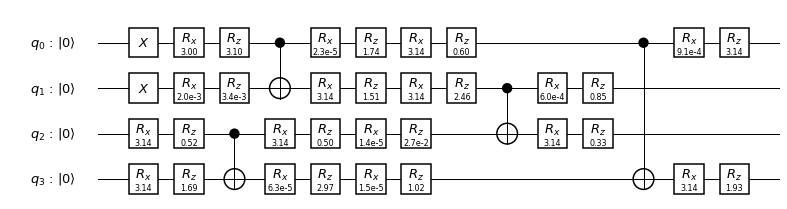

Best value is: -1.0551573959036142
Number of iterations is: 1


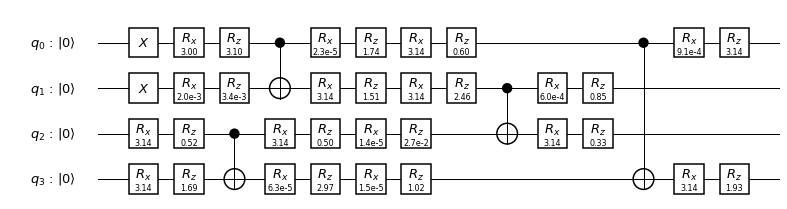

=== h2_0.6 ===
Minimal eigenvalue is  -1.1162860078265338
Initial state is 1100
Initial value: -1.1010923911533357
Iteration #1 is finished, 11494 circuit evaluations performed
  Values: -1.1011176316934832, -1.1011059372558998, -1.1011055046943328, -1.1010904939271227!
  New value: -1.1011176316934832!


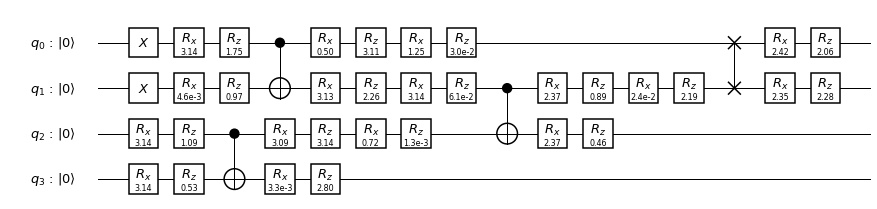

Iteration #2 is finished, 14530 circuit evaluations performed
  Values: -1.1011085947756136, -1.1010640968984498, -1.1010635217781573, -1.100993240175684!
Iteration #3 is finished, 15705 circuit evaluations performed
  Values: -1.101118340290748, -1.1010783469617023, -1.1010694166009891, -1.1010439065125792!
  New value: -1.101118340290748!


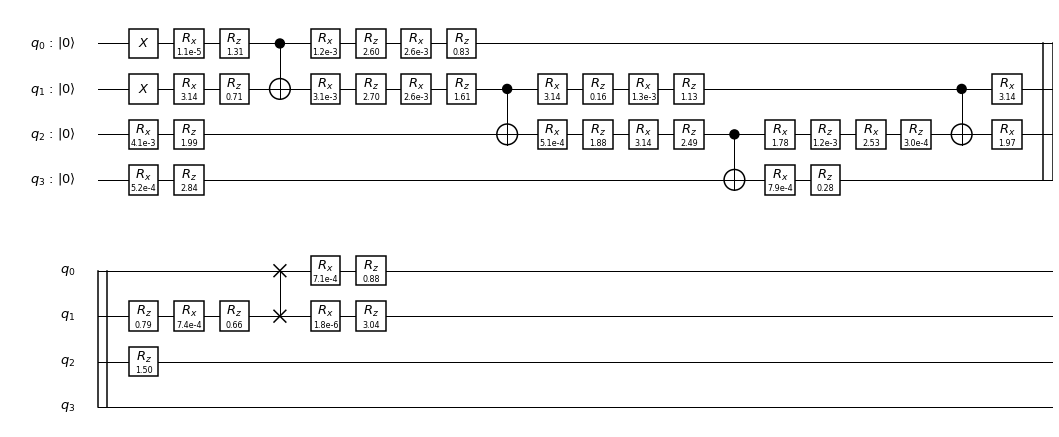

Iteration #4 is finished, 19781 circuit evaluations performed
  Values: -1.101117789195002, -1.1011106728565594, -1.1010901214270157, -1.1010739185804848!
Iteration #5 is finished, 23218 circuit evaluations performed
  Values: -1.1161799966286103, -1.1026870852978858, -1.1012080518368854, -1.1010998415641466!
  New value: -1.1161799966286103!


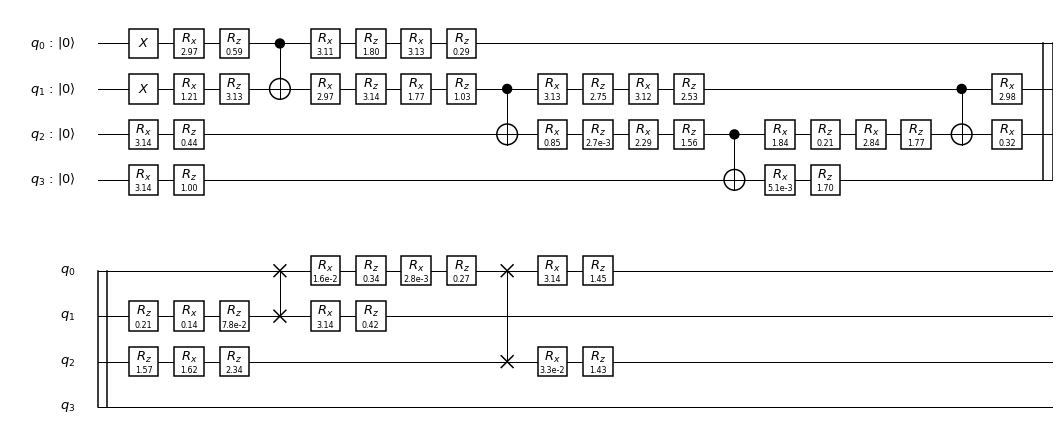

Best value is: -1.1161799966286103
Number of iterations is: 5


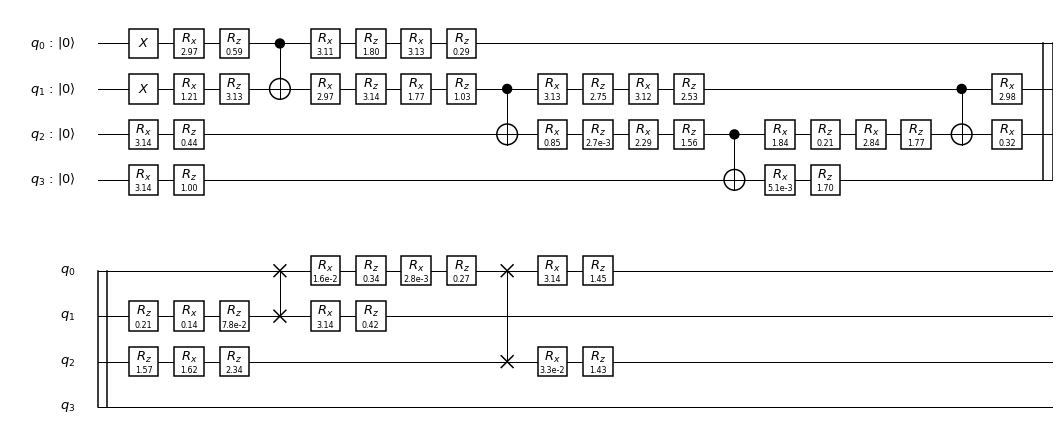

=== h2_0.7 ===
Minimal eigenvalue is  -1.1361894542708848
Initial state is 1100
Initial value: -1.117342669148692
Iteration #1 is finished, 7688 circuit evaluations performed
  Values: -1.1173490098050178, -1.1173490068019452, -1.1173468046096142, -1.117321743290916!
  New value: -1.1173490098050178!


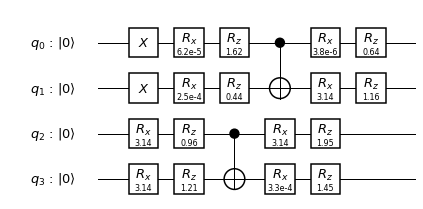

Iteration #2 is finished, 8424 circuit evaluations performed
  Values: -1.136182663936836, -1.1173449985675097, -1.117339438152687, -1.1173292808348894!
  New value: -1.136182663936836!


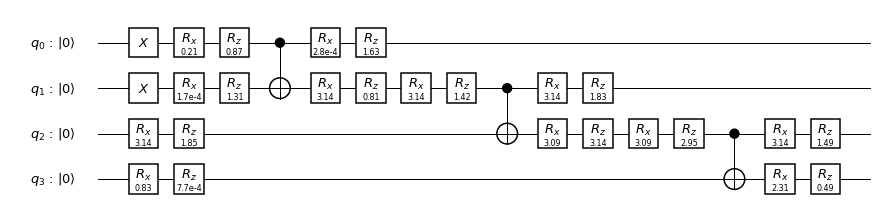

Best value is: -1.136182663936836
Number of iterations is: 2


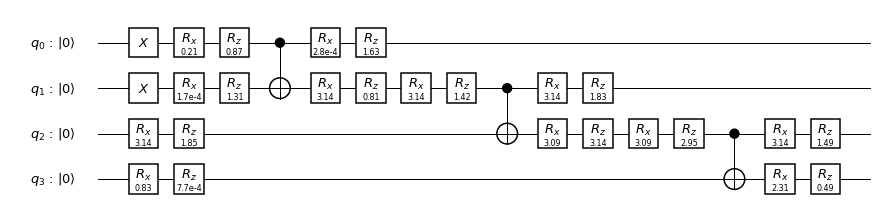

=== h2_0.8 ===
Minimal eigenvalue is  -1.1341476663578607
Initial state is 1100
Initial value: -1.1108370719778835
Iteration #1 is finished, 13412 circuit evaluations performed
  Values: -1.1108415394859323, -1.1108393931054308, -1.1108298441873838, -1.1108137057366985!
  New value: -1.1108415394859323!


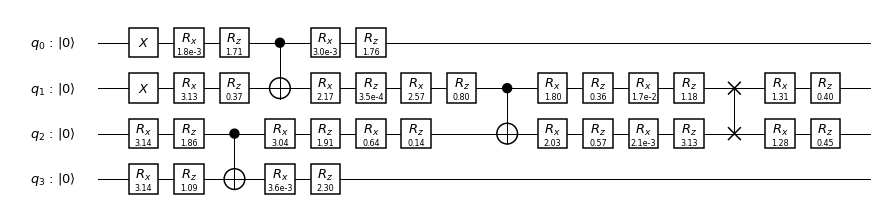

Iteration #2 is finished, 12829 circuit evaluations performed
  Values: -1.1108491066573893, -1.1108484873949955, -1.1108234619800903, -1.1107372480550255!
  New value: -1.1108491066573893!


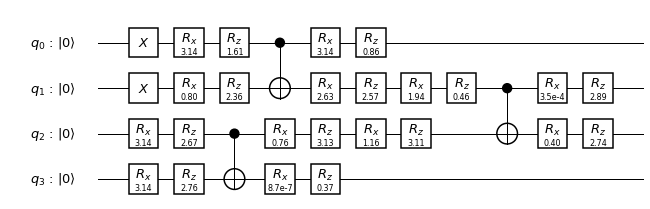

Iteration #3 is finished, 9026 circuit evaluations performed
  Values: -1.110850389710994, -1.110850383417378, -1.1108382369232126, -1.110834713084579!
  New value: -1.110850389710994!


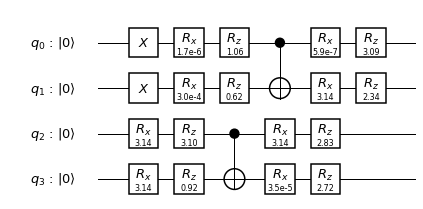

Iteration #4 is finished, 8203 circuit evaluations performed
  Values: -1.1108430450070044, -1.110833766647476, -1.1108193881175112, -0.5971533507584379!
Iteration #5 is finished, 4384 circuit evaluations performed
  Values: -1.1108503966392653, -1.1108503933898968, -1.1107869845066893, -0.5971756067819893!
  New value: -1.1108503966392653!


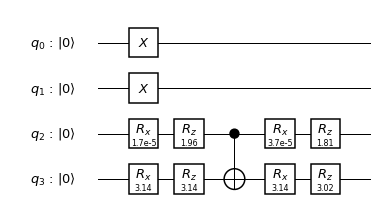

Iteration #6 is finished, 4848 circuit evaluations performed
  Values: -1.1108503886276815, -1.1108497833466857, -1.1108489061871072, -1.11084864434905!
Iteration #7 is finished, 2726 circuit evaluations performed
  Values: -1.1108503969854677, -1.1108503969854677, -1.1108499505857174, -1.1108488736403028!
  New value: -1.1108503969854677!


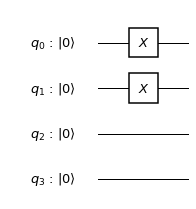

Iteration #8 is finished, 2300 circuit evaluations performed
  Values: -1.1108503956225664, -1.1108503942628847, -1.1108503931651321, -1.1108500819515512!
Iteration #9 is finished, 1631 circuit evaluations performed
  Values: -1.1108503969854677, -1.110850394217486, -1.1108503871134707, -1.1108502651837988!
Iteration #10 is finished, 1921 circuit evaluations performed
  Values: -1.1108503969854677, -1.1108503969299692, -1.1108503943991446, -1.1108503859584486!
Iteration #11 is finished, 1741 circuit evaluations performed
  Values: -1.1108503969854677, -1.110850395943599, -1.1108503794124192, -1.110850353279509!
Iteration #12 is finished, 1132 circuit evaluations performed
  Values: -1.1108503969854677, -1.1108503969854677, -1.1108503876665088, -1.11085036126593!
Iteration #13 is finished, 2550 circuit evaluations performed
  Values: -1.1108503960782625, -1.1108503960054736, -1.110850391667261, -1.1108503341985432!
Iteration #14 is finished, 1741 circuit evaluations performed
  Values: 

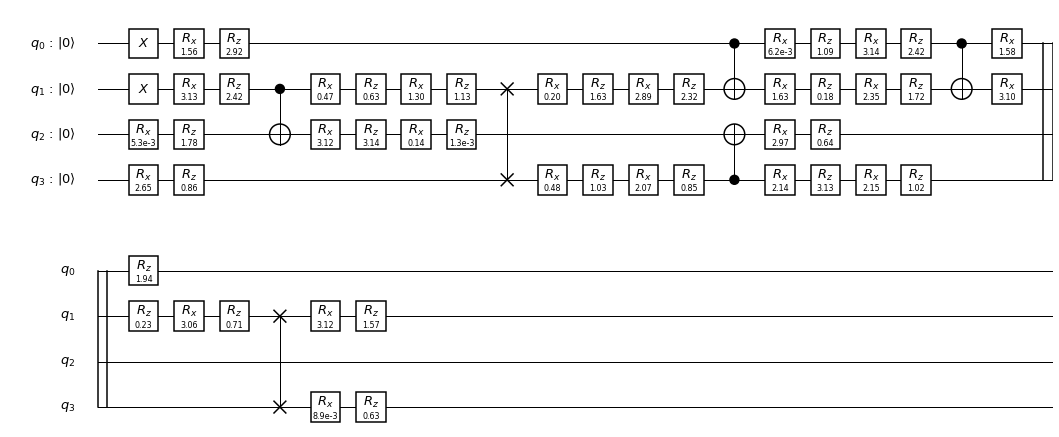

Best value is: -1.1340750398014545
Number of iterations is: 19


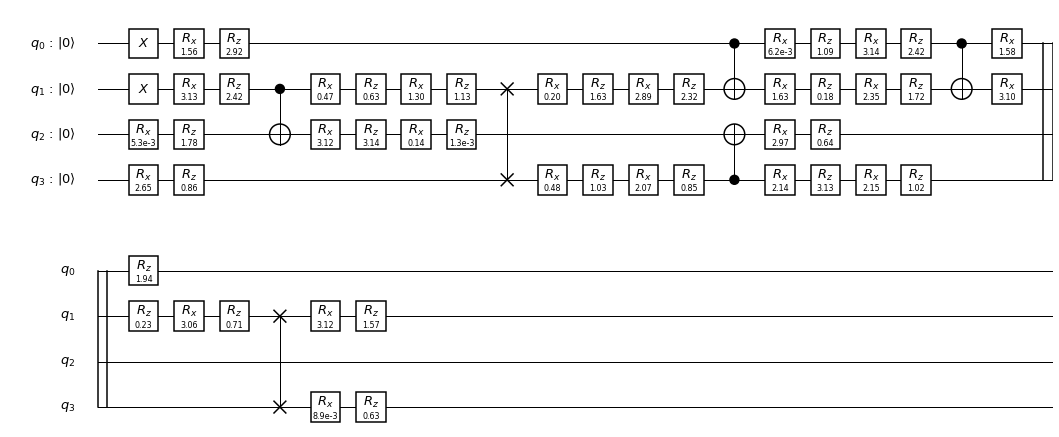

=== h2_0.9 ===
Minimal eigenvalue is  -1.1205602806186363
Initial state is 1100
Initial value: -1.091899432950488
Iteration #1 is finished, 12828 circuit evaluations performed
  Values: -1.1205302717521406, -1.0919137022298582, -1.0919081158776929, -1.0918906794127783!
  New value: -1.1205302717521406!


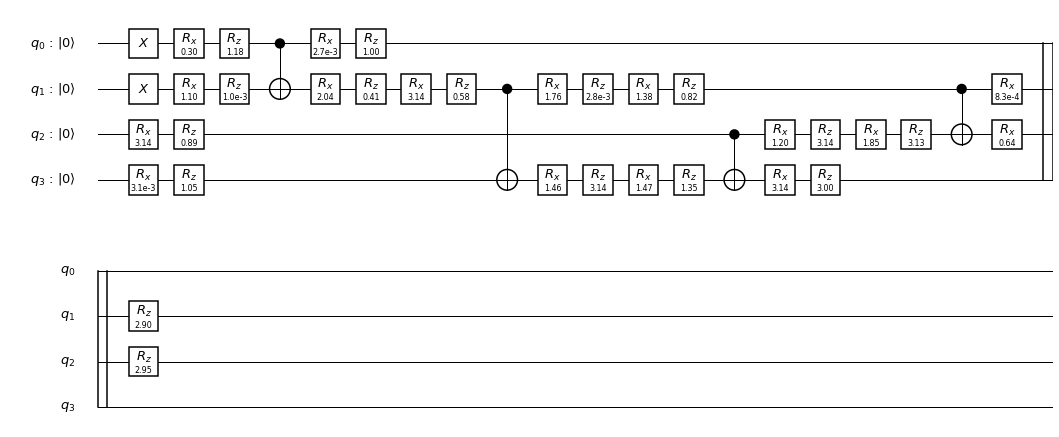

Best value is: -1.1205302717521406
Number of iterations is: 1


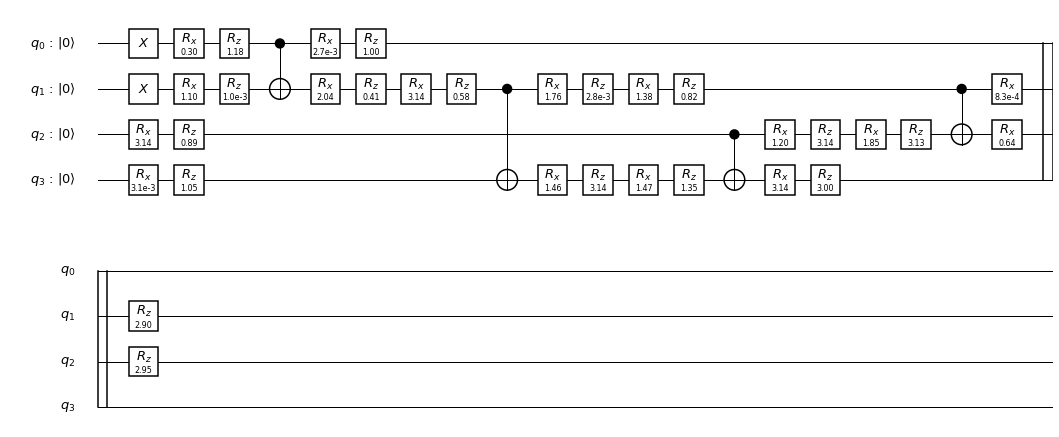

=== h2_1.0 ===
Minimal eigenvalue is  -1.1011503293035885
Initial state is 1100
Initial value: -1.06610686209289
Iteration #1 is finished, 11270 circuit evaluations performed
  Values: -1.066105636023621, -1.0660805780789355, -1.0660578916686032, -1.0660482517056618!
Iteration #2 is finished, 10576 circuit evaluations performed
  Values: -1.0661086001101827, -1.0660991164042097, -1.0660987862985283, -1.0660630655271914!
  New value: -1.0661086001101827!


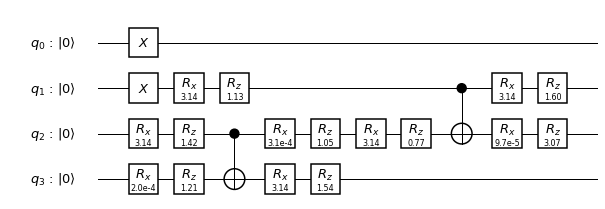

Iteration #3 is finished, 6255 circuit evaluations performed
  Values: -1.0661086473670118, -1.0661079034397731, -1.0661054537734433, -1.06607525533038!
  New value: -1.0661086473670118!


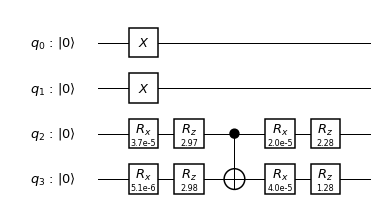

Iteration #4 is finished, 2210 circuit evaluations performed
  Values: -1.0661086480817523, -1.0661086480817523, -1.0661085802962842, -0.7458651348119811!
  New value: -1.0661086480817523!


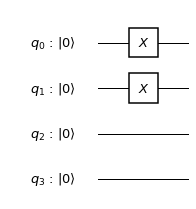

Iteration #5 is finished, 1611 circuit evaluations performed
  Values: -1.0661086480817523, -1.0661086480153394, -1.0661085857722143, -1.0661085378827644!
Iteration #6 is finished, 1631 circuit evaluations performed
  Values: -1.0661086480817523, -1.0661086466971148, -1.0661086378064433, -1.066108473518543!
Iteration #7 is finished, 2180 circuit evaluations performed
  Values: -1.0661086475362964, -1.0661086472799017, -1.0661086255117023, -1.0661085696777264!
Iteration #8 is finished, 1831 circuit evaluations performed
  Values: -1.0661086480817523, -1.0661086478137094, -1.0661086372295983, -1.0661056068729506!
Iteration #9 is finished, 2140 circuit evaluations performed
  Values: -1.0661086477313577, -1.0661086440081973, -1.066108600114494, -0.7458717945649757!
Iteration #10 is finished, 1831 circuit evaluations performed
  Values: -1.0661086480817523, -1.0661086438228558, -1.066108640871529, -1.0661086405558224!
Iteration #11 is finished, 1631 circuit evaluations performed
  Values: 

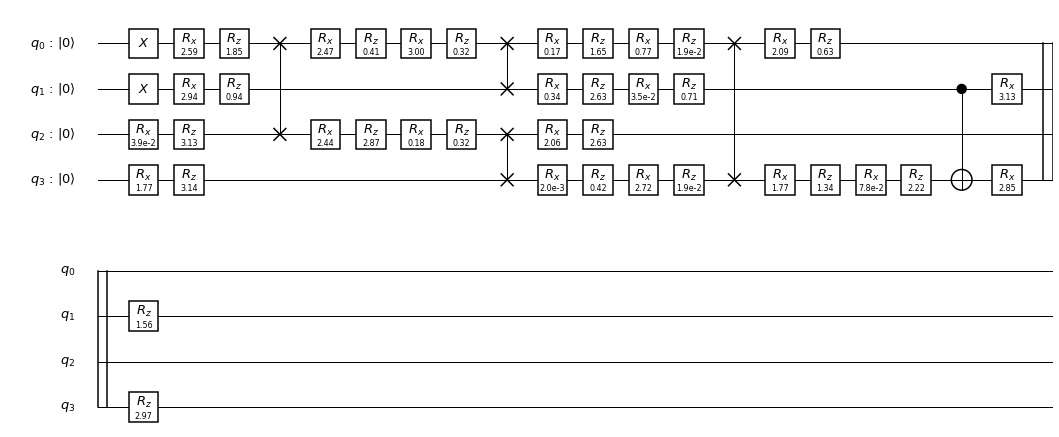

Iteration #17 is finished, 23542 circuit evaluations performed
  Values: -1.0797580033377479, -1.0773657666174143, -1.0660646597961017, -1.0660392033301633!
  New value: -1.0797580033377479!


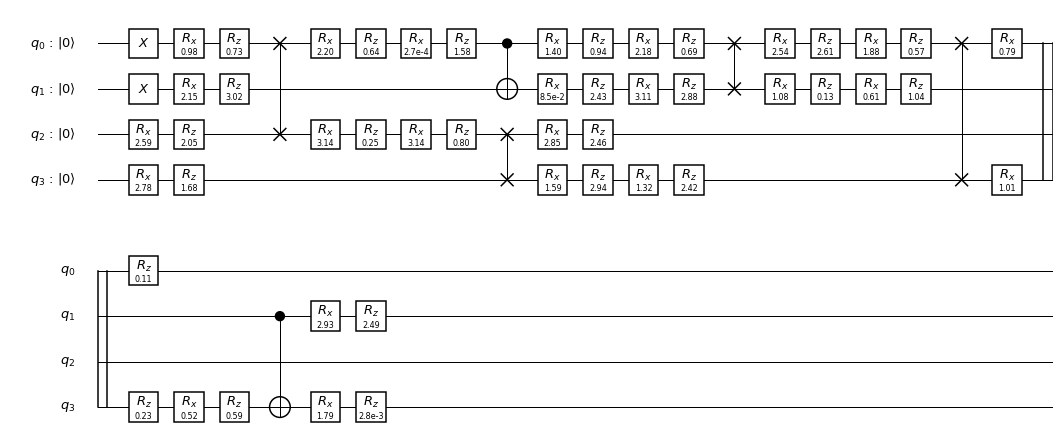

Iteration #18 is finished, 29491 circuit evaluations performed
  Values: -1.0912536058216775, -1.0753339028977502, -1.0703626145835112, -1.0660367814198994!
  New value: -1.0912536058216775!


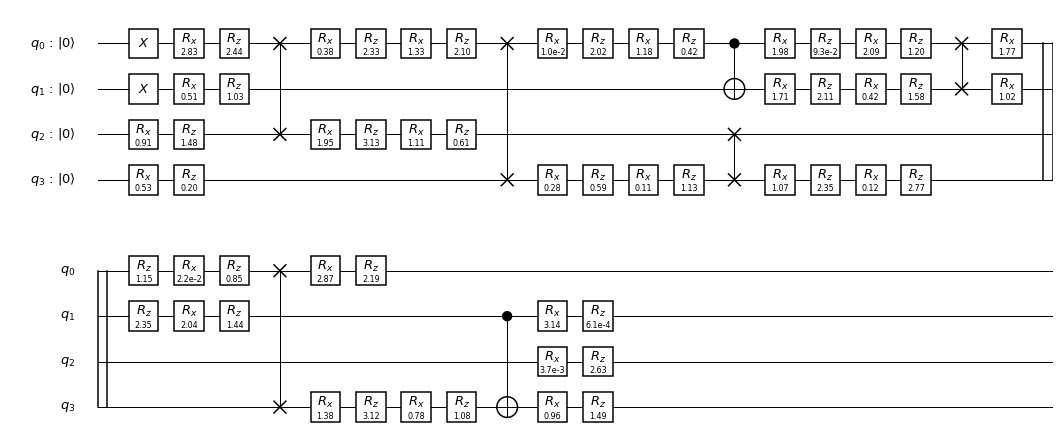

Iteration #19 is finished, 41347 circuit evaluations performed
  Values: -1.1009346897305496, -1.099633593214541, -1.0967117304921152, -1.0660816650296618!
  New value: -1.1009346897305496!


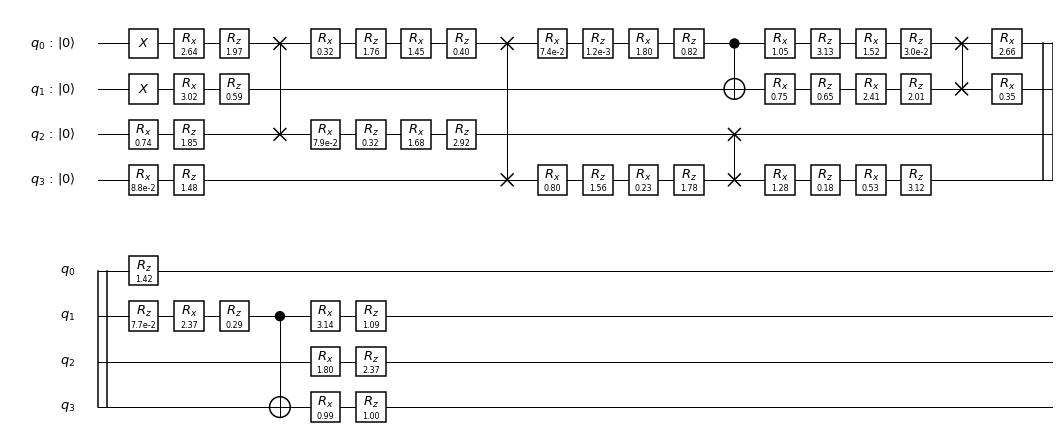

Best value is: -1.1009346897305496
Number of iterations is: 19


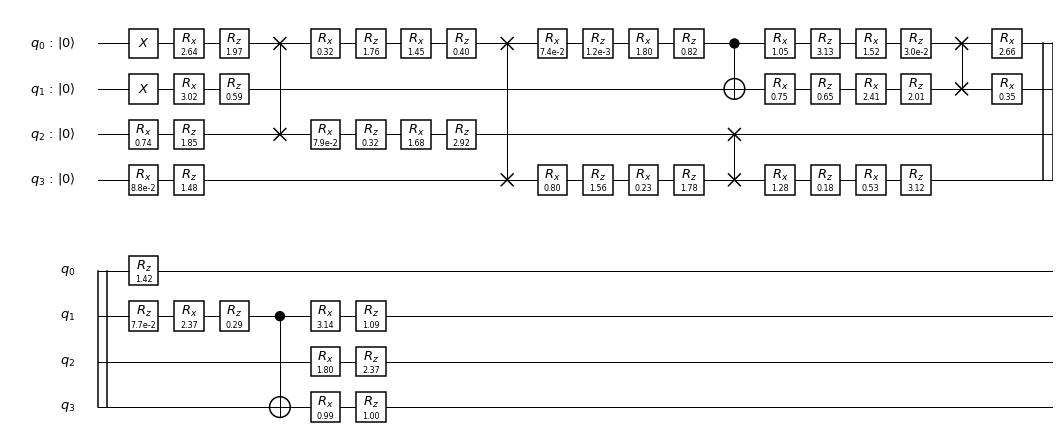

=== h2_1.1 ===
Minimal eigenvalue is  -1.0791929438802301
Initial state is 1100
Initial value: -1.0365246781128261
Iteration #1 is finished, 12936 circuit evaluations performed
  Values: -1.044444092039297, -1.0417460439770516, -1.03803376579829, -1.03652775955311!
  New value: -1.044444092039297!


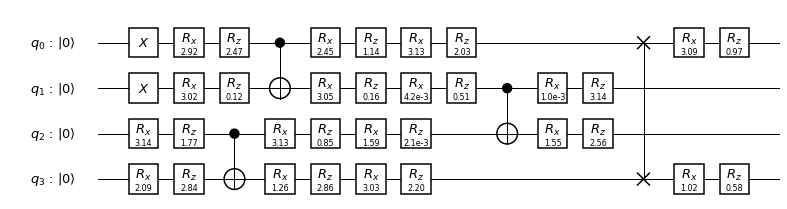

Iteration #2 is finished, 14193 circuit evaluations performed
  Values: -1.041998153185241, -1.0365298509330967, -1.0365289481830982, -1.0365117720669812!
Iteration #3 is finished, 17325 circuit evaluations performed
  Values: -1.059693508177703, -1.0444283483549401, -1.0443616706347925, -1.036531510074433!
  New value: -1.059693508177703!


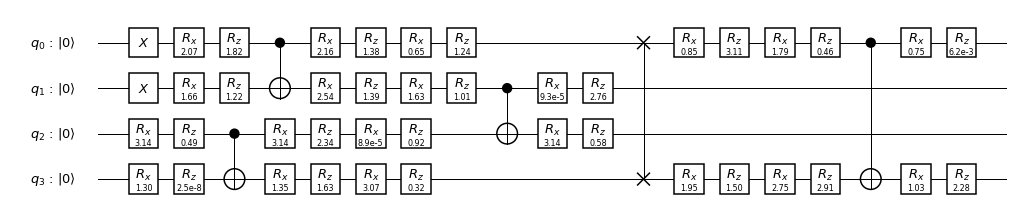

Iteration #4 is finished, 18820 circuit evaluations performed
  Values: -1.0791267238447277, -1.0705588757469648, -1.059555805787637, -1.0365255166937233!
  New value: -1.0791267238447277!


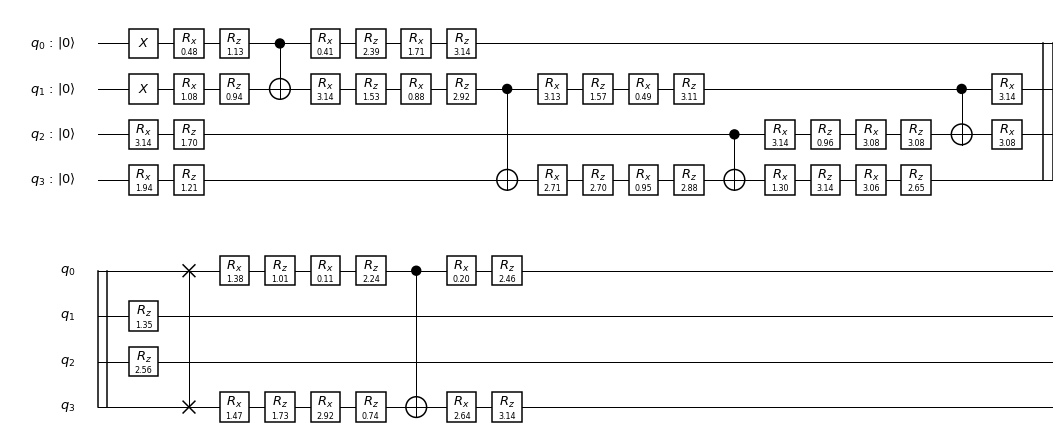

Best value is: -1.0791267238447277
Number of iterations is: 4


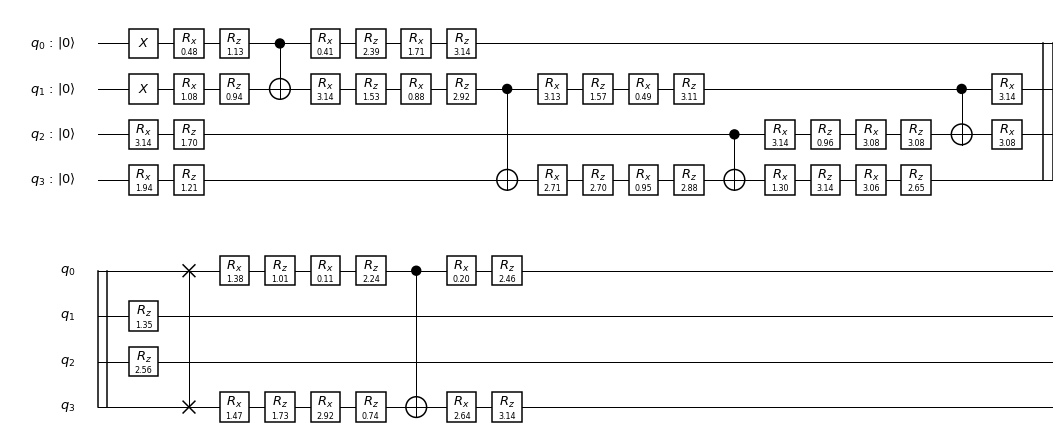

=== h2_1.2 ===
Minimal eigenvalue is  -1.0567407451325903
Initial state is 1100
Initial value: -1.0051038565562833
Iteration #1 is finished, 13174 circuit evaluations performed
  Values: -1.0141399387592709, -1.0050933038826495, -1.0050902844460712, -1.0050484612649726!
  New value: -1.0141399387592709!


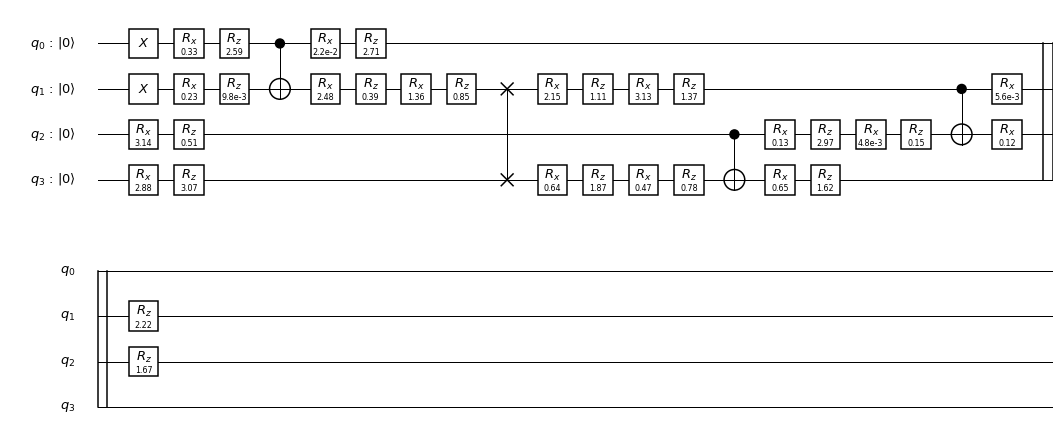

Iteration #2 is finished, 16563 circuit evaluations performed
  Values: -1.0146436175220146, -1.0146115809659875, -1.005106428362646, -0.8283746174997157!
  New value: -1.0146436175220146!


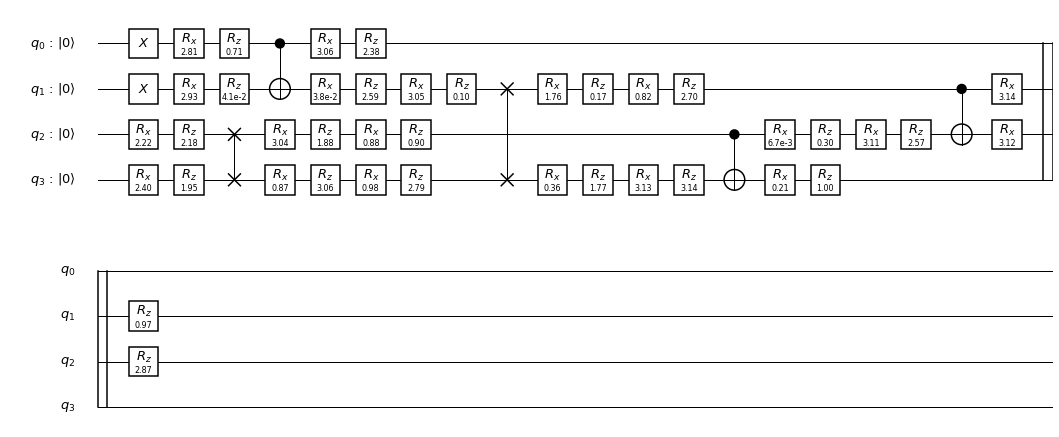

Iteration #3 is finished, 22602 circuit evaluations performed
  Values: -1.038978507001578, -1.0146299862702326, -1.0146163735638112, -1.0050696632546592!
  New value: -1.038978507001578!


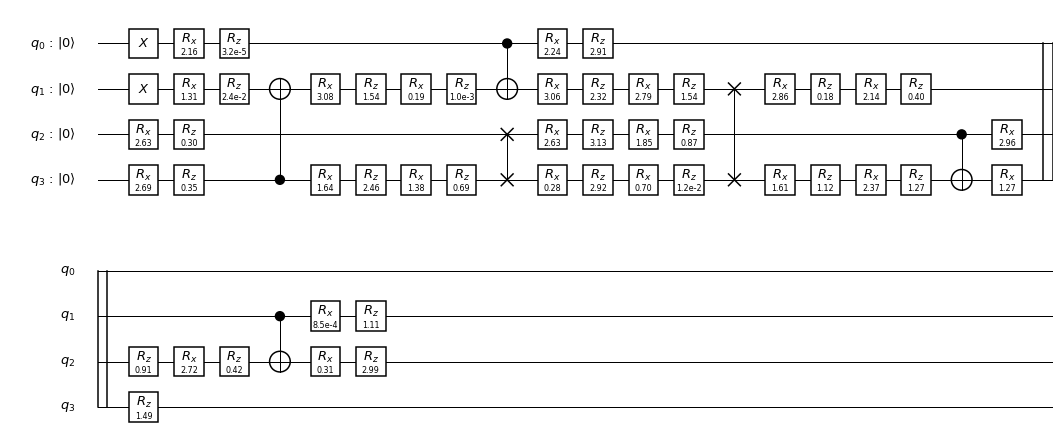

Iteration #4 is finished, 34688 circuit evaluations performed
  Values: -1.0566046195635013, -1.056247301120313, -1.050391436935817, -1.036376032861965!
  New value: -1.0566046195635013!


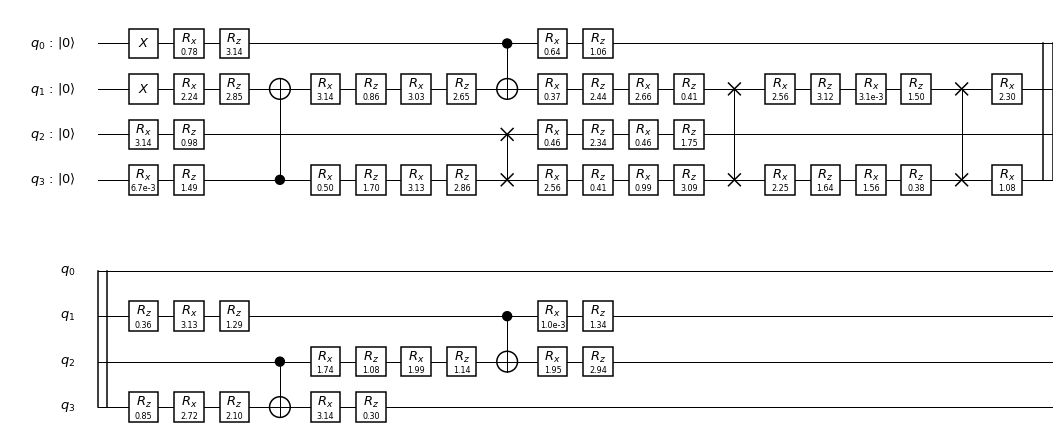

Best value is: -1.0566046195635013
Number of iterations is: 4


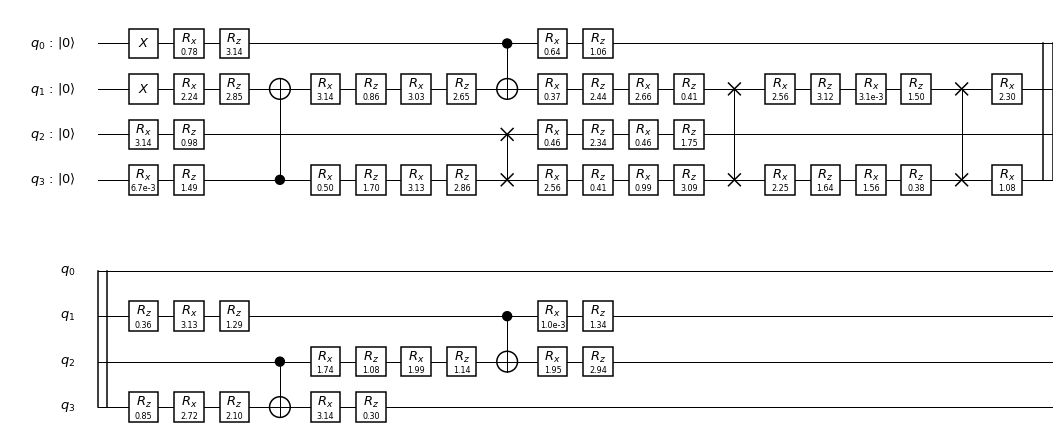

=== h2_1.3 ===
Minimal eigenvalue is  -1.0351862652459827
Initial state is 1100
Initial value: -0.973109941318215
Iteration #1 is finished, 10556 circuit evaluations performed
  Values: -1.0351480045537889, -0.9730896593584999, -0.9730887660193219, -0.9730814114122149!
  New value: -1.0351480045537889!


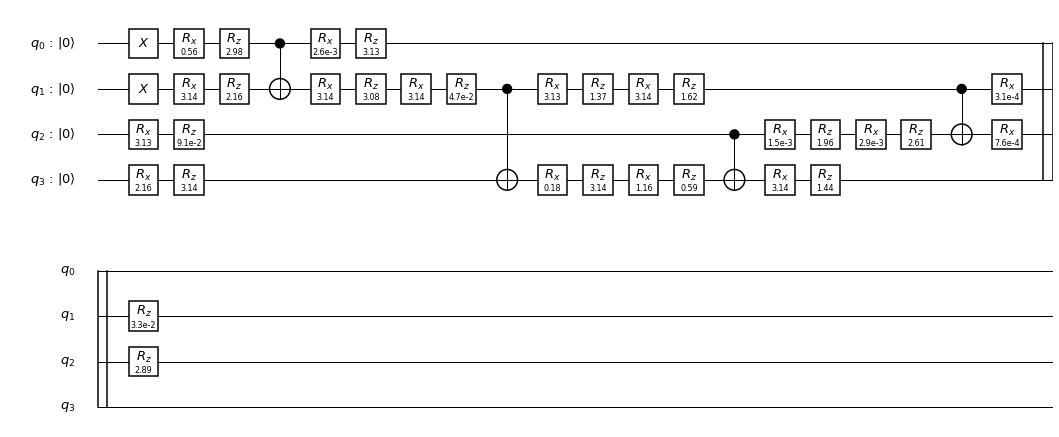

Best value is: -1.0351480045537889
Number of iterations is: 1


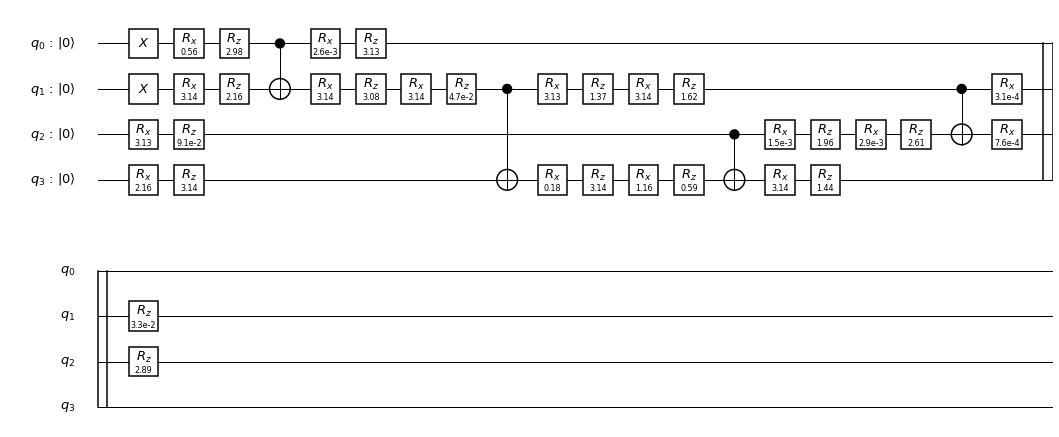

=== h2_1.4 ===
Minimal eigenvalue is  -1.015468248142691
Initial state is 1100
Initial value: -0.8754219090159671
Iteration #1 is finished, 11326 circuit evaluations performed
  Values: -0.9414802810558676, -0.9414561336295428, -0.9414551209015959, -0.9414374591419543!
  New value: -0.9414802810558676!


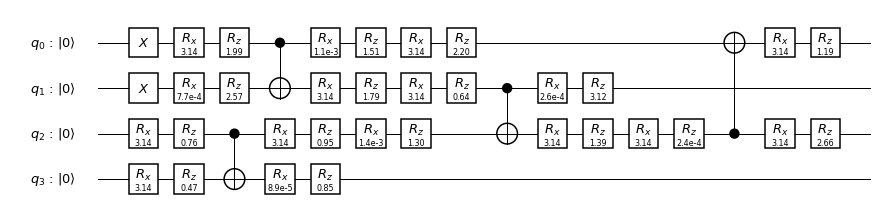

Iteration #2 is finished, 17790 circuit evaluations performed
  Values: -1.0153195689068104, -0.9414793537602467, -0.9413554773621093, -0.875401540467474!
  New value: -1.0153195689068104!


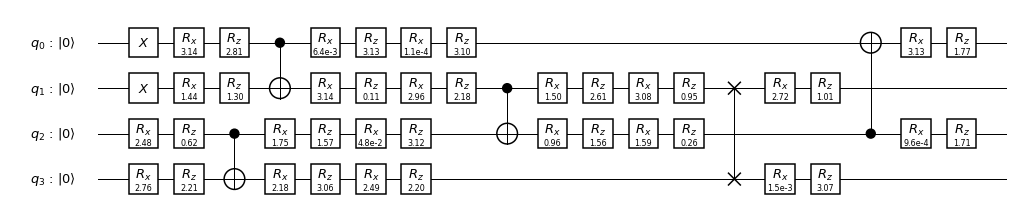

Best value is: -1.0153195689068104
Number of iterations is: 2


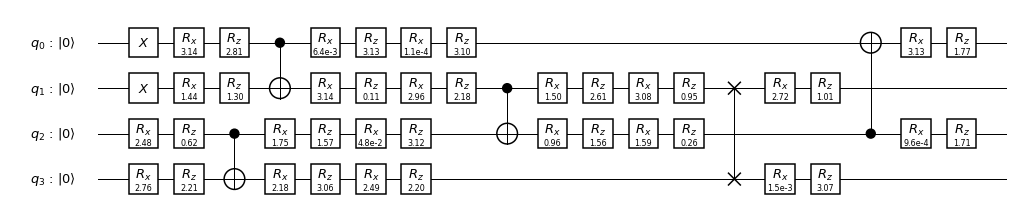

=== h2_1.5 ===
Minimal eigenvalue is  -0.9981493524136997
Initial state is 1100
Initial value: -0.9108733647297311
Iteration #1 is finished, 12026 circuit evaluations performed
  Values: -0.9108711631063259, -0.9108610783662622, -0.9107607976703781, -0.8915239427824985!
Iteration #2 is finished, 10220 circuit evaluations performed
  Values: -0.9108689560596414, -0.9108658508378411, -0.9108350400450508, -0.8905710812545049!
Iteration #3 is finished, 8946 circuit evaluations performed
  Values: -0.9108728511119416, -0.9108663177772259, -0.9108655933269242, -0.9108626682247766!
Iteration #4 is finished, 8578 circuit evaluations performed
  Values: -0.964319027058421, -0.9108733209592186, -0.9108727842167865, -0.9108414787220135!
  New value: -0.964319027058421!


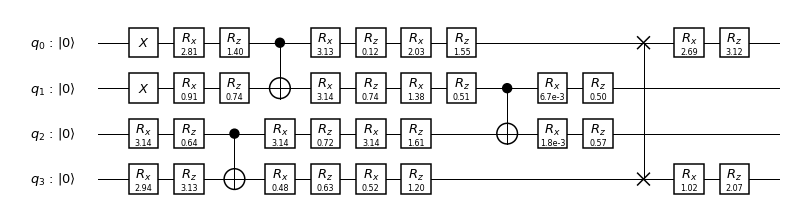

Iteration #5 is finished, 16710 circuit evaluations performed
  Values: -0.9643411479986965, -0.9643246573998805, -0.9643186258179384, -0.9576277601708495!
  New value: -0.9643411479986965!


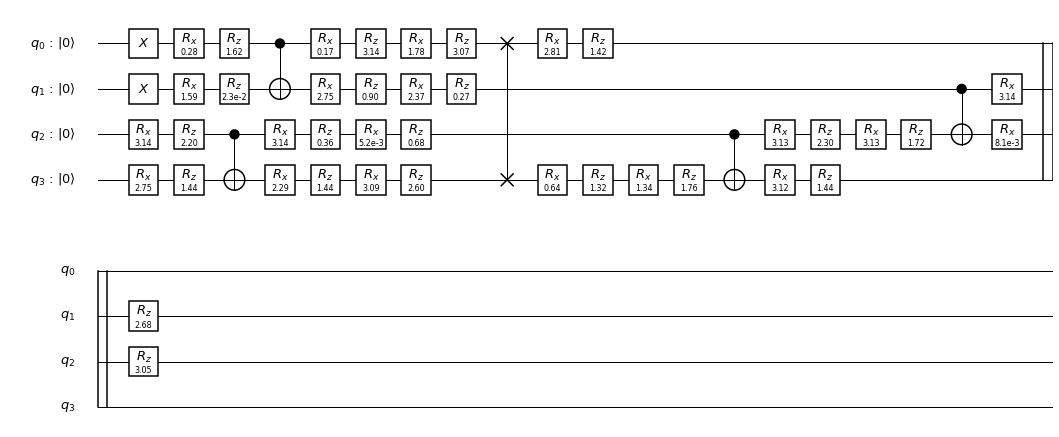

Iteration #6 is finished, 18920 circuit evaluations performed
  Values: -0.9980536771425319, -0.9643302433698488, -0.9599264875985772, -0.9108013428798257!
  New value: -0.9980536771425319!


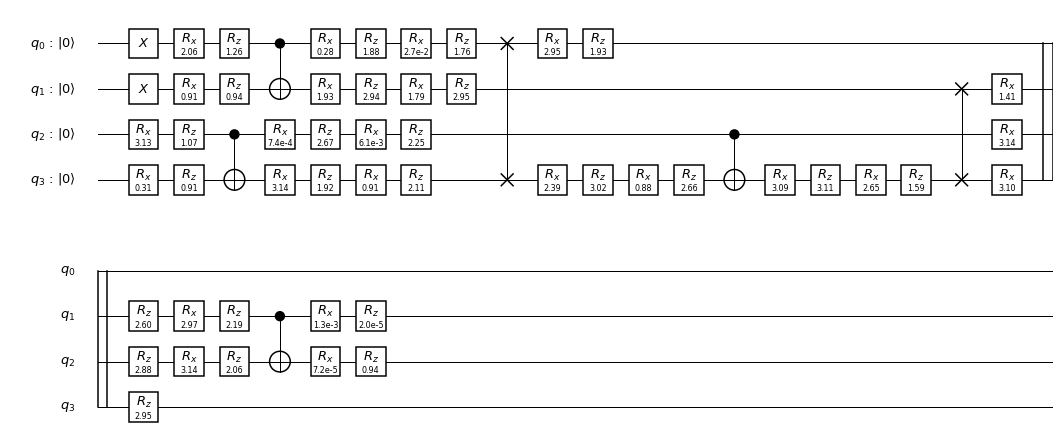

Best value is: -0.9980536771425319
Number of iterations is: 6


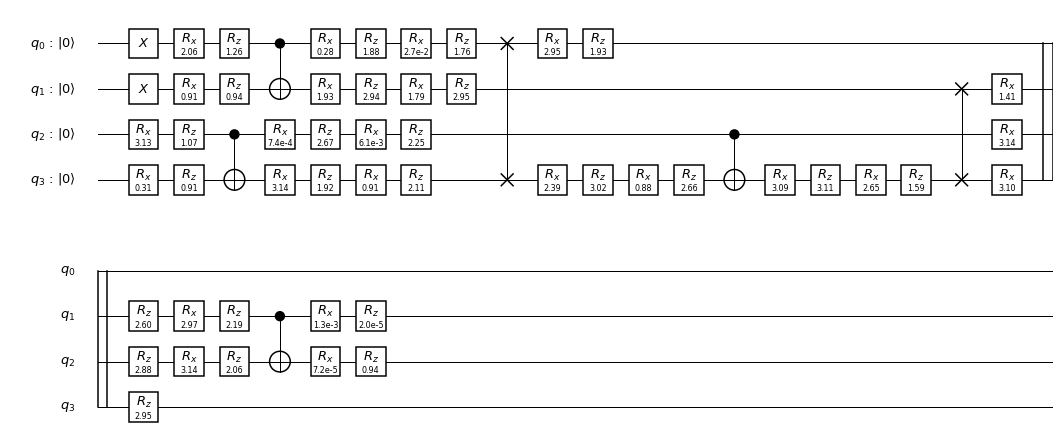

=== h2_1.6 ===
Minimal eigenvalue is  -0.9834727280932722
Initial state is 1010
Initial value: -0.901899793484872
Iteration #1 is finished, 12334 circuit evaluations performed
  Values: -0.9834416258602079, -0.9018842510407293, -0.9018723015436788, -0.90183272827905!
  New value: -0.9834416258602079!


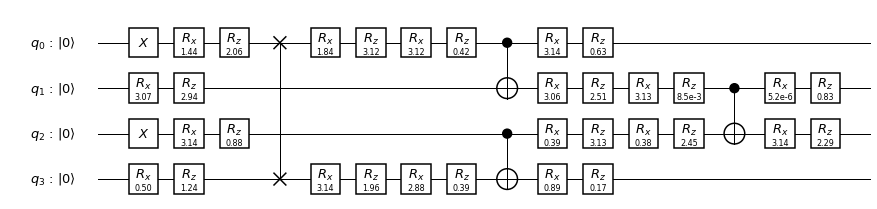

Best value is: -0.9834416258602079
Number of iterations is: 1


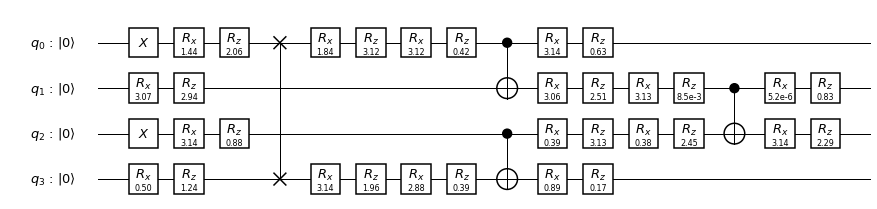

=== h2_1.7 ===
Minimal eigenvalue is  -0.9714266876511373
Initial state is 1010
Initial value: -0.9103291453707186
Iteration #1 is finished, 10682 circuit evaluations performed
  Values: -0.9209828230815114, -0.9103372825417397, -0.9103351873499486, -0.910328555912481!
  New value: -0.9209828230815114!


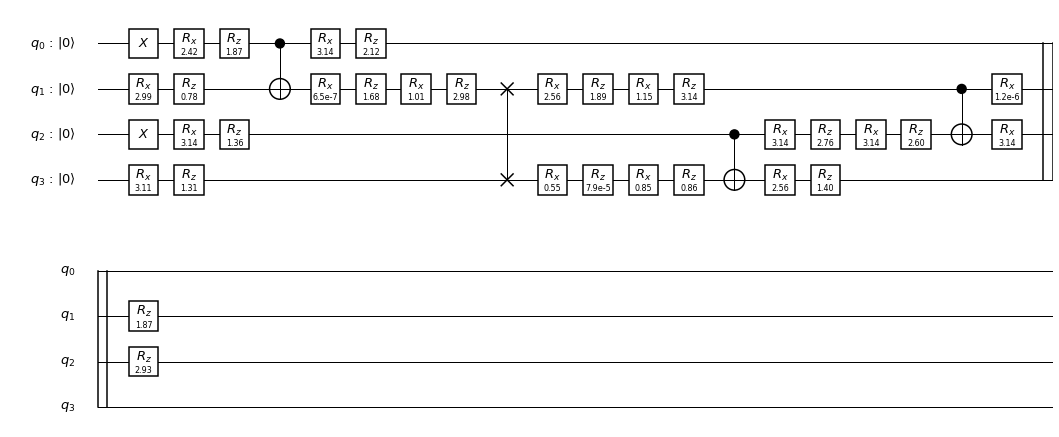

Iteration #2 is finished, 11554 circuit evaluations performed
  Values: -0.9202805243662341, -0.9103365790239911, -0.9103227803753844, -0.9102798310084794!
Iteration #3 is finished, 17295 circuit evaluations performed
  Values: -0.9713683548978167, -0.9205849360841921, -0.9104785088003877, -0.9102814642103283!
  New value: -0.9713683548978167!


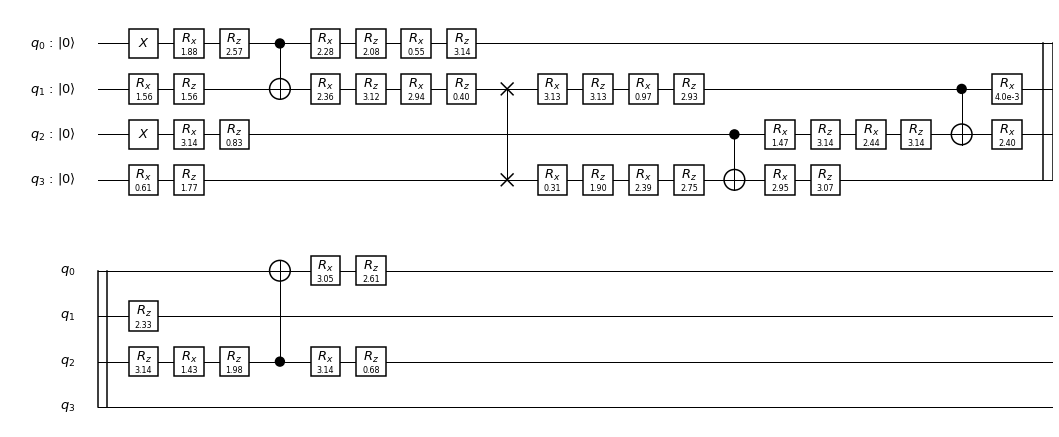

Best value is: -0.9713683548978167
Number of iterations is: 3


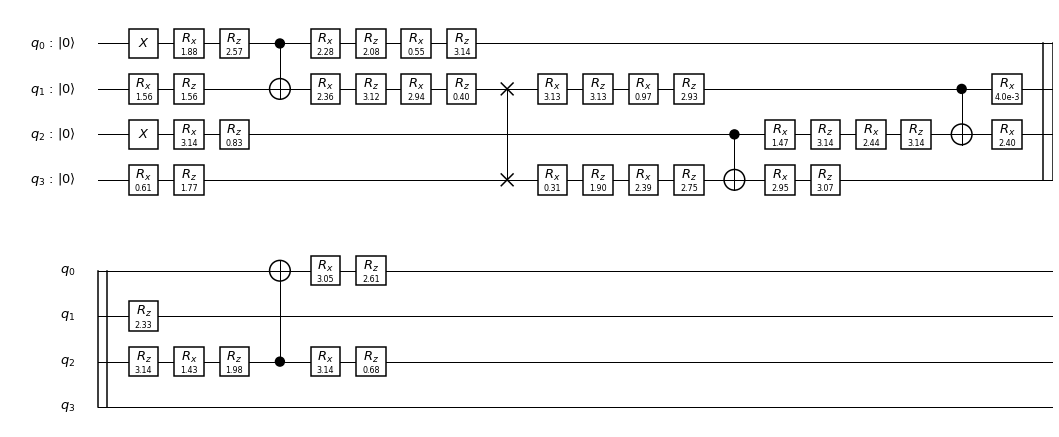

=== h2_1.8 ===
Minimal eigenvalue is  -0.9618169521199165
Initial state is 0101
Initial value: -0.9165724377814531
Iteration #1 is finished, 10490 circuit evaluations performed
  Values: -0.9617851938292461, -0.9165749038033251, -0.9165403959278684, -0.9164959295242031!
  New value: -0.9617851938292461!


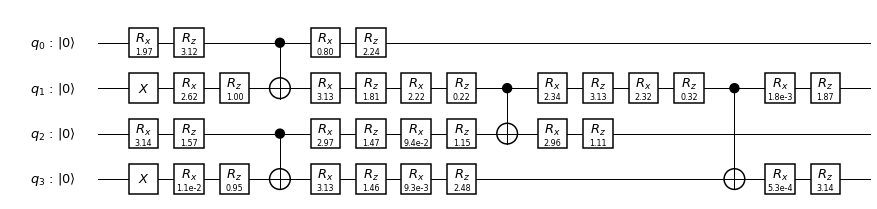

Best value is: -0.9617851938292461
Number of iterations is: 1


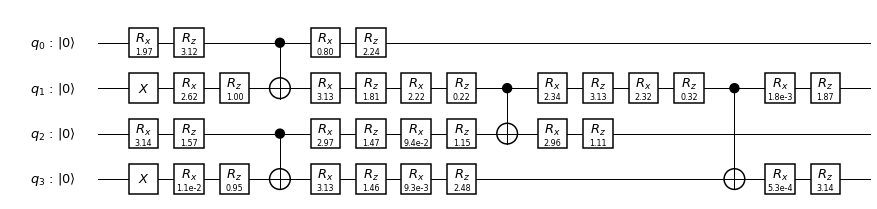

=== h2_1.9 ===
Minimal eigenvalue is  -0.9543388534525789
Initial state is 0101
Initial value: -0.9211666189374282
Iteration #1 is finished, 10100 circuit evaluations performed
  Values: -0.954272113047804, -0.9211695342482891, -0.9211675381698993, -0.9211553855661816!
  New value: -0.954272113047804!


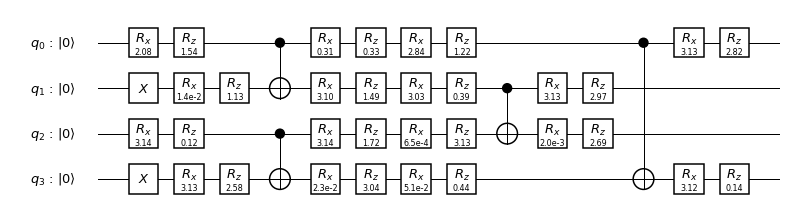

Best value is: -0.954272113047804
Number of iterations is: 1


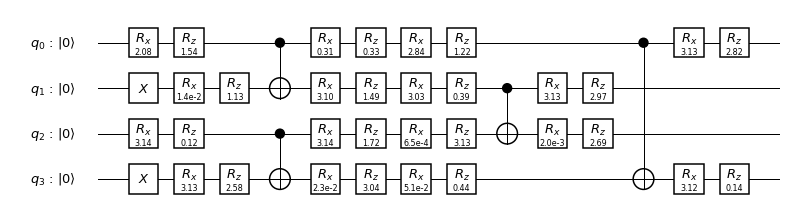

=== h2_2.0 ===
Minimal eigenvalue is  -0.9486411117424078
Initial state is 0101
Initial value: -0.9245324244350351
Iteration #1 is finished, 11970 circuit evaluations performed
  Values: -0.9485655219340707, -0.9365260451097264, -0.9245277985073745, -0.9244946029057345!
  New value: -0.9485655219340707!


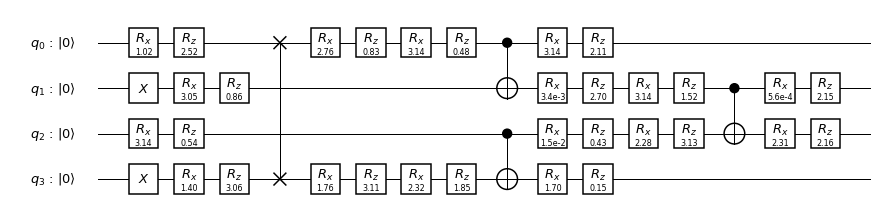

Best value is: -0.9485655219340707
Number of iterations is: 1


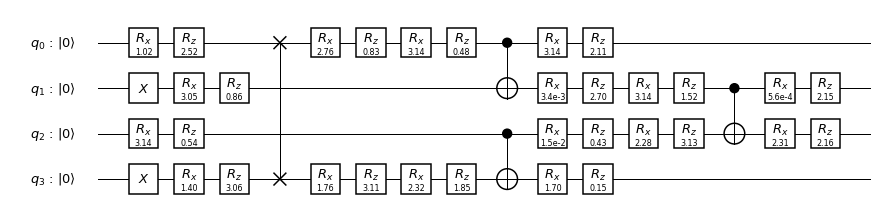

=== h2_2.1 ===
Minimal eigenvalue is  -0.9443746807813356
Initial state is 0101
Initial value: -0.9269896209536919
Iteration #1 is finished, 8774 circuit evaluations performed
  Values: -0.9269922166020337, -0.9269789885559357, -0.9269721934973351, -0.9269704212640458!
  New value: -0.9269922166020337!


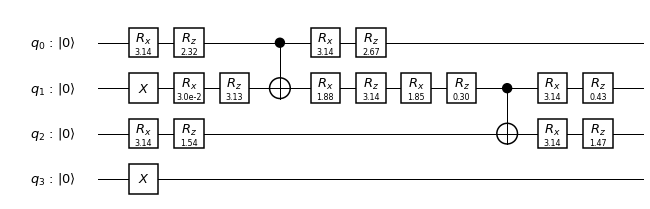

Iteration #2 is finished, 7300 circuit evaluations performed
  Values: -0.9269926803555795, -0.9269922464476805, -0.9269909183895836, -0.9269679511192902!
  New value: -0.9269926803555795!


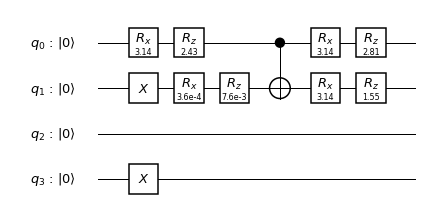

Iteration #3 is finished, 5220 circuit evaluations performed
  Values: -0.926992512071547, -0.9269923092621328, -0.9269912197303868, -0.9269783434759781!
Iteration #4 is finished, 2174 circuit evaluations performed
  Values: -0.9269926921973224, -0.9269926921973224, -0.9269923256853688, -0.9269918197776784!
  New value: -0.9269926921973224!


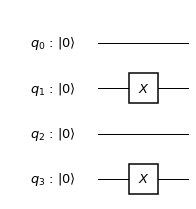

Iteration #5 is finished, 2340 circuit evaluations performed
  Values: -0.9269926920496057, -0.9269926883697356, -0.9269926882650931, -0.926992220922337!
Iteration #6 is finished, 1581 circuit evaluations performed
  Values: -0.9269926921973224, -0.9269926898782807, -0.9269926330109958, -0.9269809532634482!
Iteration #7 is finished, 1571 circuit evaluations performed
  Values: -0.9269926921973224, -0.9269926915320172, -0.9269926866015447, -0.9269926848933185!
Iteration #8 is finished, 1082 circuit evaluations performed
  Values: -0.9269926921973224, -0.9269926921973224, -0.9269926822597409, -0.8455851228620166!
Iteration #9 is finished, 1561 circuit evaluations performed
  Values: -0.9269926921973224, -0.9269926883331073, -0.9269926789487085, -0.9269926083066787!
Iteration #10 is finished, 2400 circuit evaluations performed
  Values: -0.9269926907211242, -0.9269926837428567, -0.9269925765187952, -0.9269920247794498!
Iteration #11 is finished, 1441 circuit evaluations performed
  Values

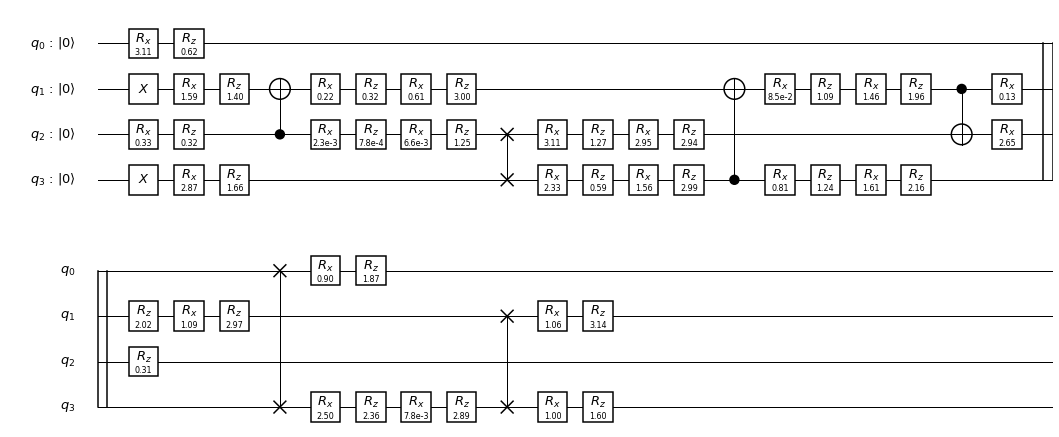

Iteration #16 is finished, 24987 circuit evaluations performed
  Values: -0.9315998360372616, -0.9293489800809734, -0.9288758261374128, -0.9288354879061522!
  New value: -0.9315998360372616!


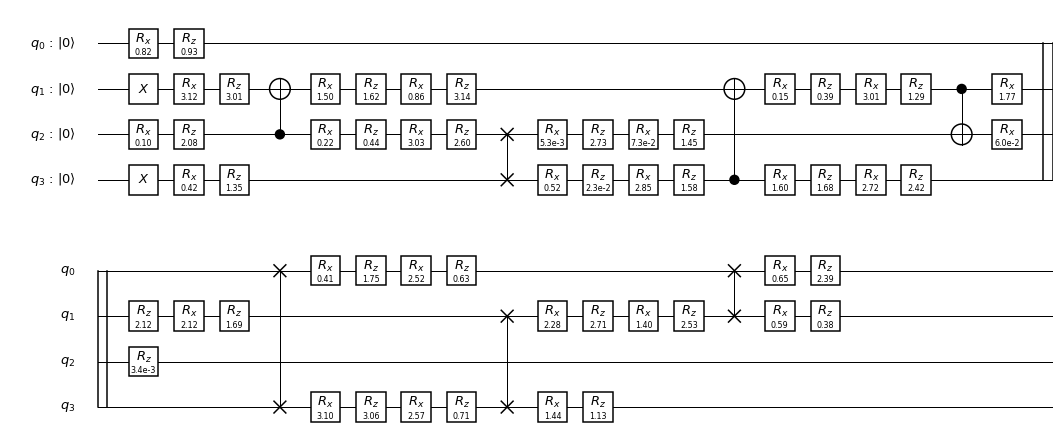

Iteration #17 is finished, 29138 circuit evaluations performed
  Values: -0.9345271692433085, -0.9310451020757652, -0.9270696141686329, -0.9265512493681961!
  New value: -0.9345271692433085!


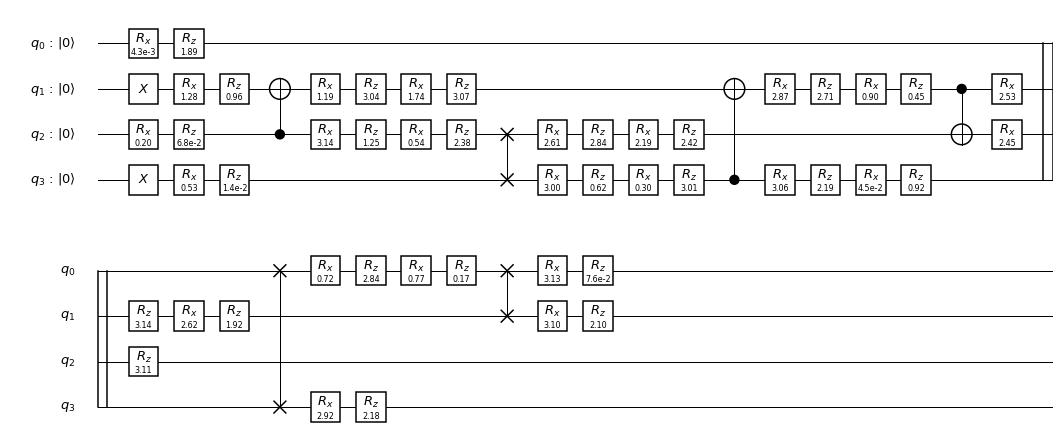

Iteration #18 is finished, 22396 circuit evaluations performed
  Values: -0.9361693734655762, -0.935393534861766, -0.9269732006511789, -0.9268774742269307!
  New value: -0.9361693734655762!


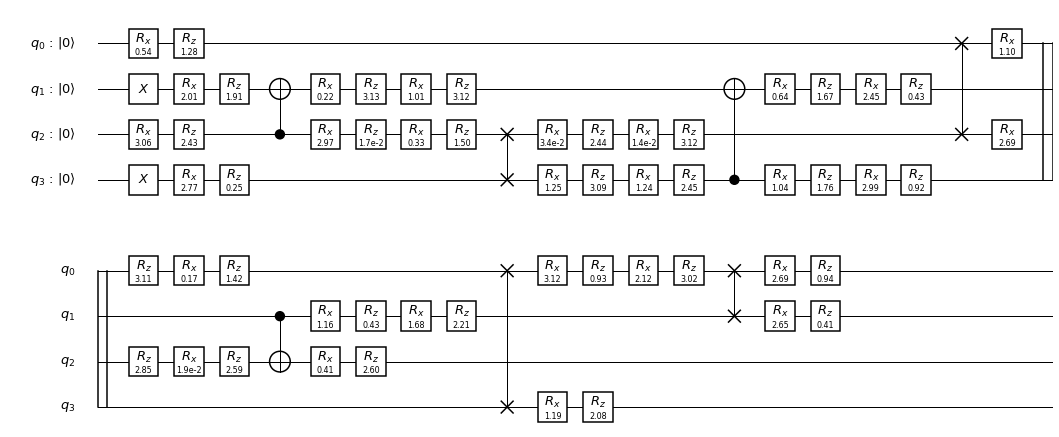

Iteration #19 is finished, 35728 circuit evaluations performed
  Values: -0.9432065240157778, -0.9394531620899689, -0.9352591631919216, -0.9266634573870809!
  New value: -0.9432065240157778!


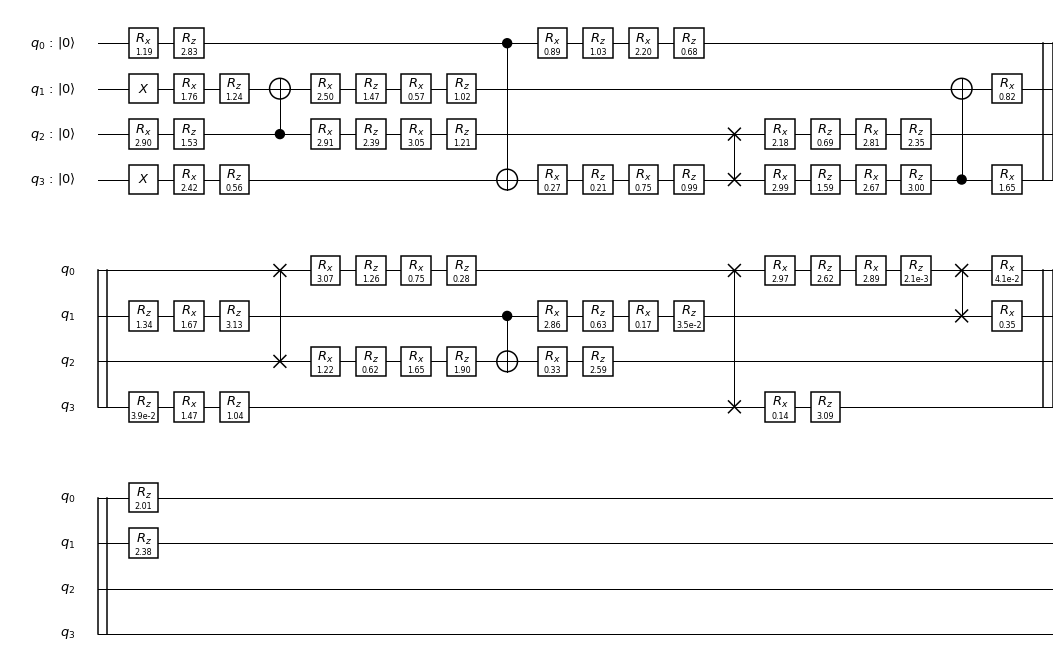

Best value is: -0.9432065240157778
Number of iterations is: 19


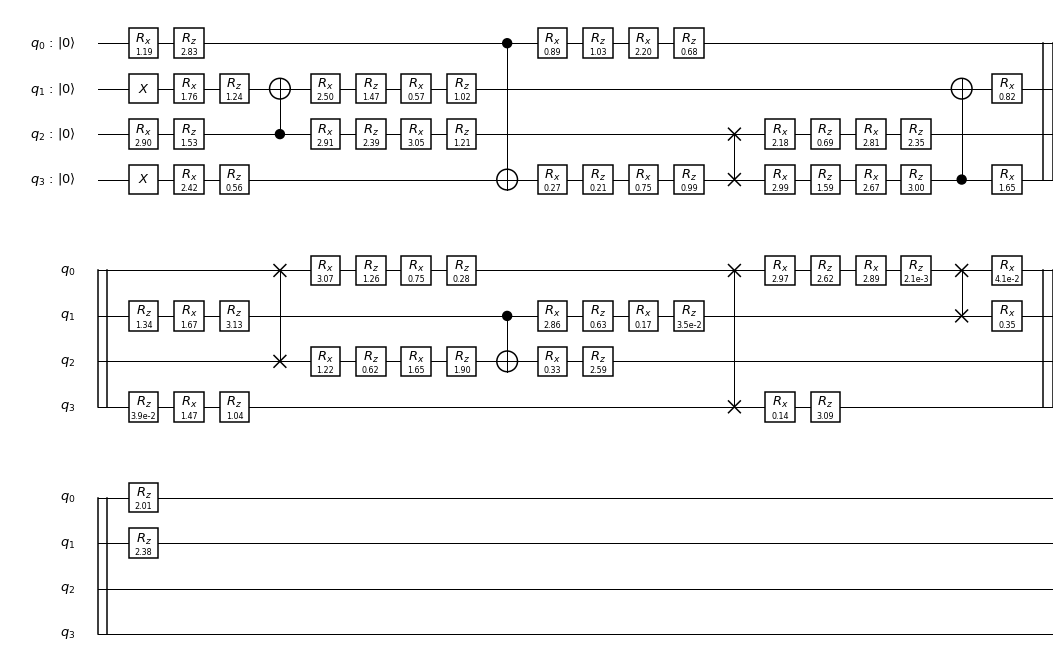

=== h2_2.2 ===
Minimal eigenvalue is  -0.9412240334330753
Initial state is 0101
Initial value: -0.9287637420533892
Iteration #1 is finished, 8994 circuit evaluations performed
  Values: -0.9351395171216488, -0.9287735864389447, -0.9287731935681259, -0.928731360218362!
  New value: -0.9351395171216488!


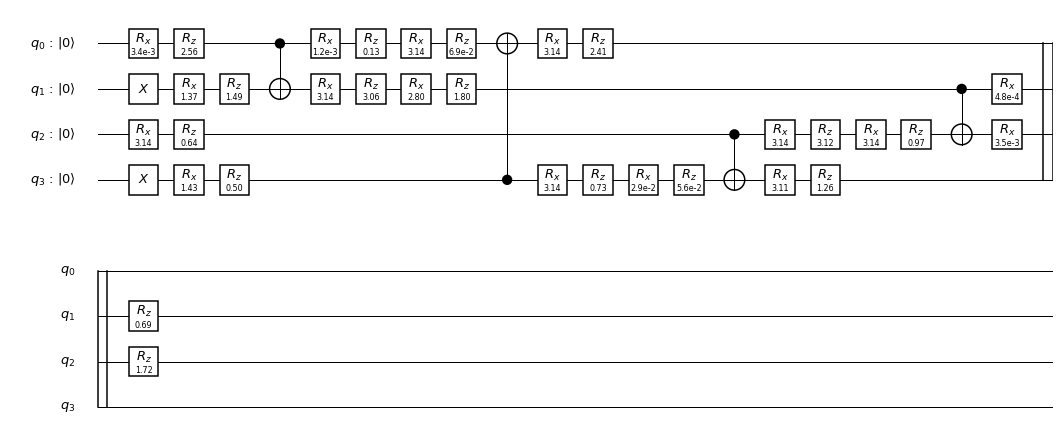

Iteration #2 is finished, 15341 circuit evaluations performed
  Values: -0.9408044138331169, -0.9350811056432917, -0.9350126530836612, -0.9287735829736383!
  New value: -0.9408044138331169!


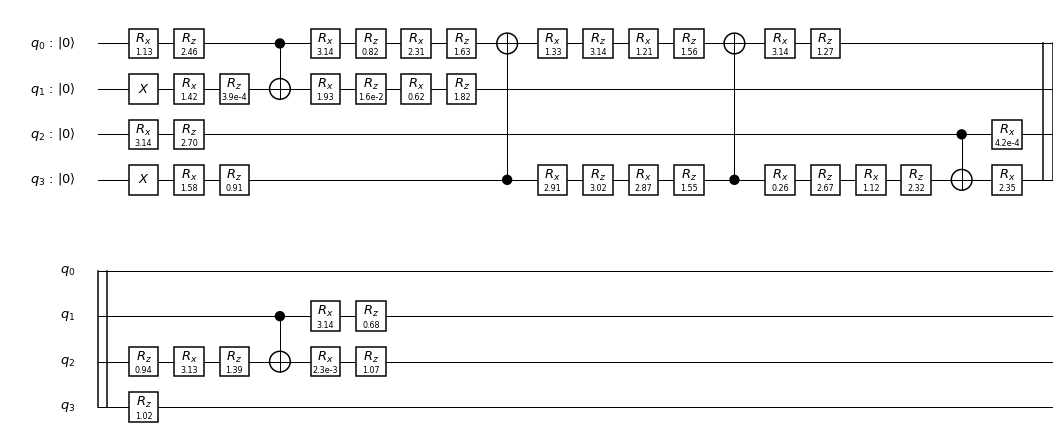

Best value is: -0.9408044138331169
Number of iterations is: 2


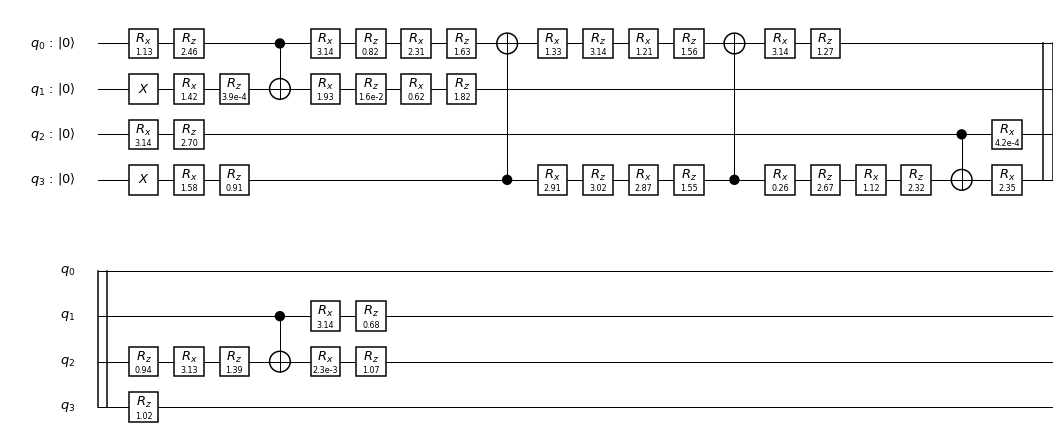

=== h2_2.3 ===
Minimal eigenvalue is  -0.938922385789505
Initial state is 0101
Initial value: -0.9300522566818584
Iteration #1 is finished, 11480 circuit evaluations performed
  Values: -0.9300547031110702, -0.9300232877116432, -0.9300050487191509, -0.9299896262032686!
  New value: -0.9300547031110702!


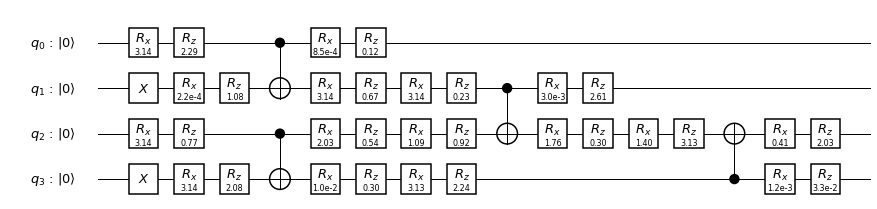

Iteration #2 is finished, 18225 circuit evaluations performed
  Values: -0.9300093808026695, -0.9299583702110404, -0.9299258878090165, -0.9299066038370933!
Iteration #3 is finished, 12731 circuit evaluations performed
  Values: -0.9300495948034658, -0.9300451586580538, -0.9300191700864545, -0.9299806024269727!
Iteration #4 is finished, 13501 circuit evaluations performed
  Values: -0.9300518511246046, -0.9300448776051087, -0.9300153693726764, -0.9299846602393698!
Iteration #5 is finished, 15065 circuit evaluations performed
  Values: -0.9300374328202805, -0.9300042311430787, -0.9299941574162841, -0.9299909265567412!
Iteration #6 is finished, 14028 circuit evaluations performed
  Values: -0.9300578209276841, -0.9300490063364624, -0.9300223623063409, -0.9299963914054931!
  New value: -0.9300578209276841!


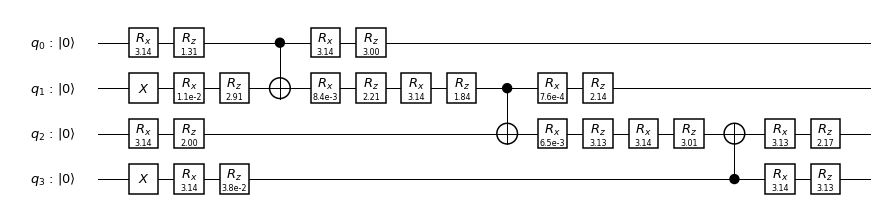

Iteration #7 is finished, 9876 circuit evaluations performed
  Values: -0.9300583988604713, -0.9300366968679167, -0.9299591077149725, -0.9299522532596667!
  New value: -0.9300583988604713!


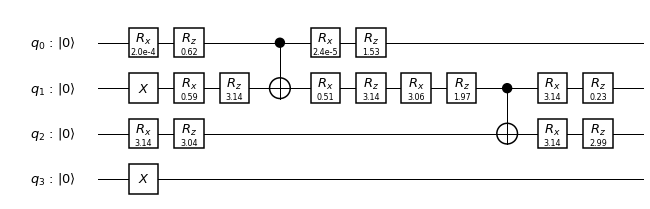

Iteration #8 is finished, 8723 circuit evaluations performed
  Values: -0.9300576403331481, -0.9300562980291784, -0.9300542090892675, -0.9300481084985616!
Iteration #9 is finished, 8632 circuit evaluations performed
  Values: -0.9300541868149916, -0.9300537835498087, -0.9300502033929775, -0.930004750549853!
Iteration #10 is finished, 7748 circuit evaluations performed
  Values: -0.9300582857937214, -0.9300564231544233, -0.9300545969239411, -0.9300379054732377!
Iteration #11 is finished, 8554 circuit evaluations performed
  Values: -0.9300582858211147, -0.9300532872092487, -0.9300490914292352, -0.9300415062859925!
Iteration #12 is finished, 6815 circuit evaluations performed
  Values: -0.934520896224209, -0.9300586342075724, -0.9300494236959288, -0.9300487546508797!
  New value: -0.934520896224209!


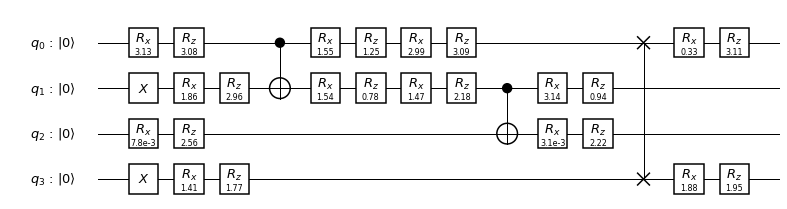

Iteration #13 is finished, 10186 circuit evaluations performed
  Values: -0.9345358322674465, -0.9344460097032585, -0.9300468594764115, -0.9300395174950082!
  New value: -0.9345358322674465!


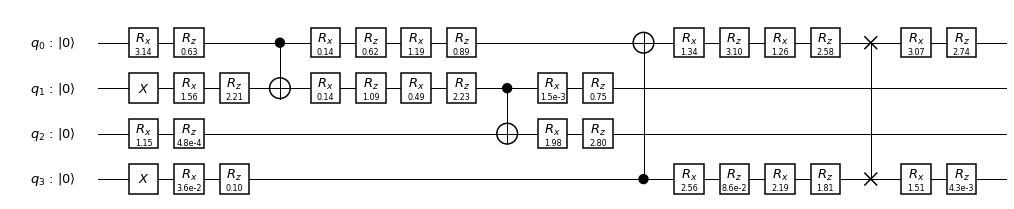

Iteration #14 is finished, 12724 circuit evaluations performed
  Values: -0.9344711821756314, -0.9343663718610045, -0.9300374661790042, -0.9298271900907649!
Iteration #15 is finished, 11942 circuit evaluations performed
  Values: -0.934580620327736, -0.9345270576290349, -0.934396026146679, -0.9300544717777767!
  New value: -0.934580620327736!


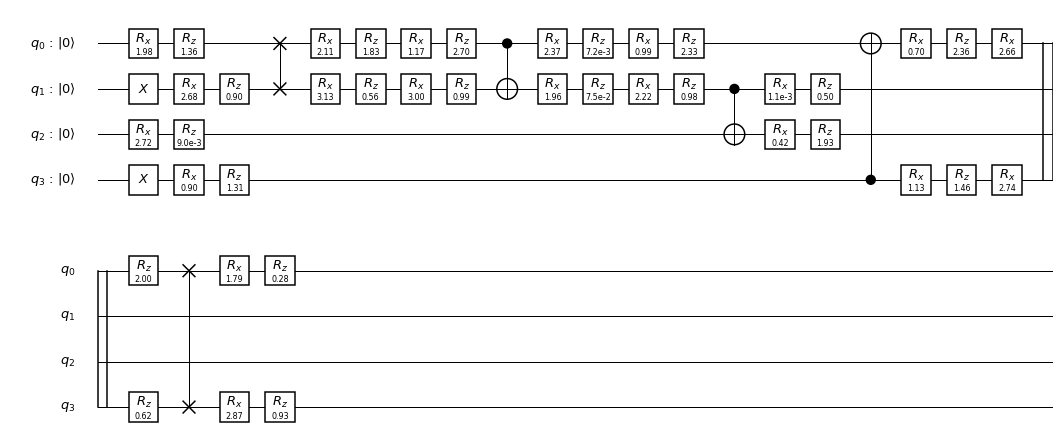

Iteration #16 is finished, 22277 circuit evaluations performed
  Values: -0.9387291571538289, -0.9385058493237002, -0.9345484043689407, -0.9344594199992796!
  New value: -0.9387291571538289!


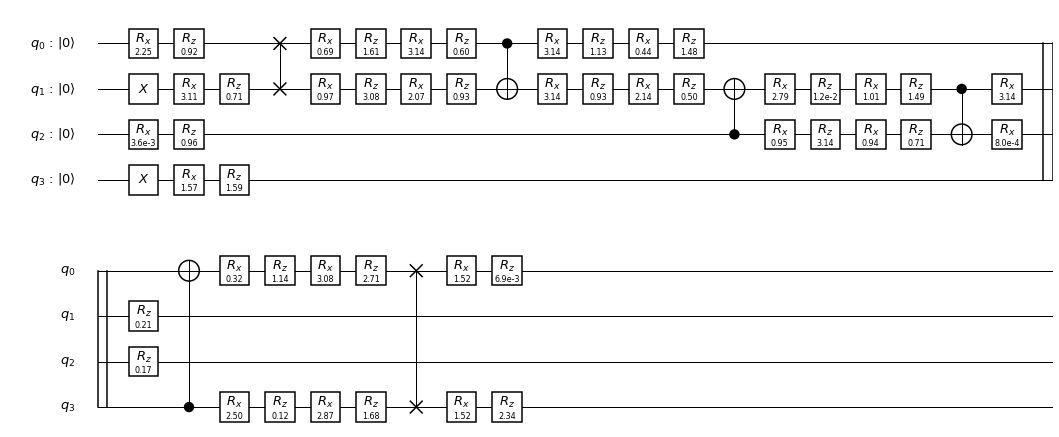

Best value is: -0.9387291571538289
Number of iterations is: 16


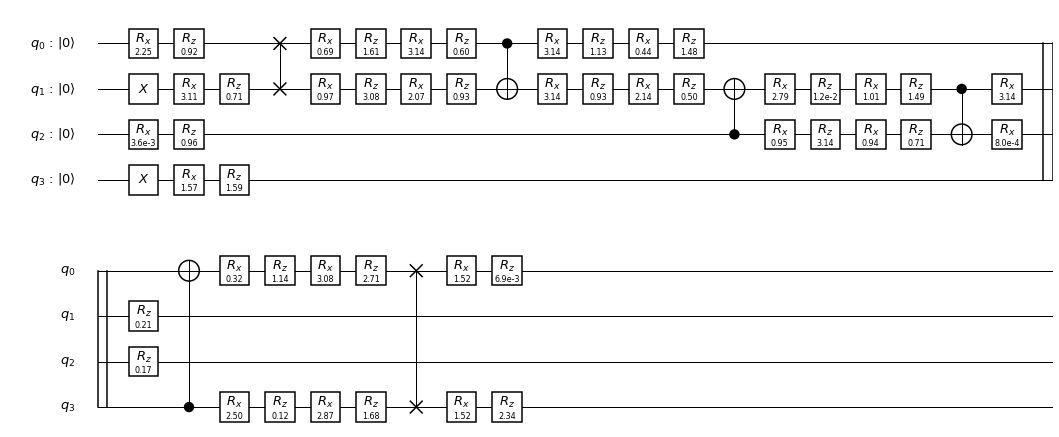

=== h2_2.4 ===
Minimal eigenvalue is  -0.9372549528606706
Initial state is 1010
Initial value: -0.9309611916684207
Iteration #1 is finished, 11242 circuit evaluations performed
  Values: -0.9309780890770472, -0.9309563034886273, -0.9309458001135857, -0.9309408774917121!
  New value: -0.9309780890770472!


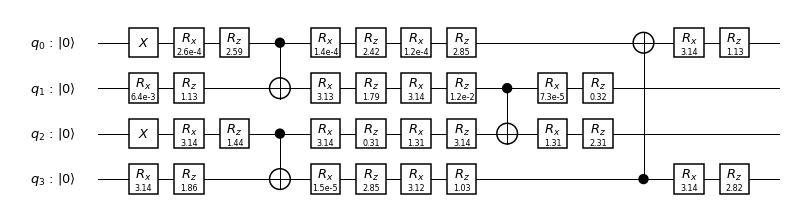

Iteration #2 is finished, 16610 circuit evaluations performed
  Values: -0.9352359048277638, -0.9341271405088976, -0.9339707512046872, -0.9309542356269976!
  New value: -0.9352359048277638!


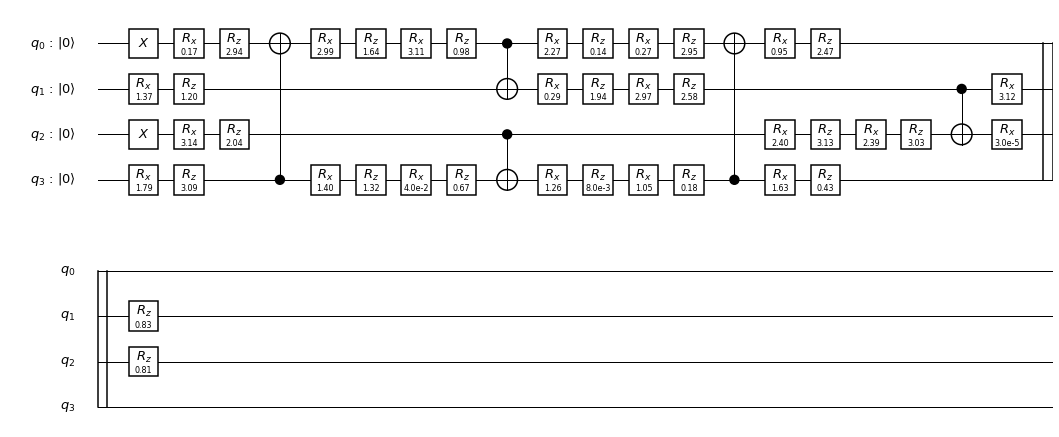

Iteration #3 is finished, 26955 circuit evaluations performed
  Values: -0.9362381673773141, -0.9340825995862756, -0.9340642381498928, -0.9338625528004325!
  New value: -0.9362381673773141!


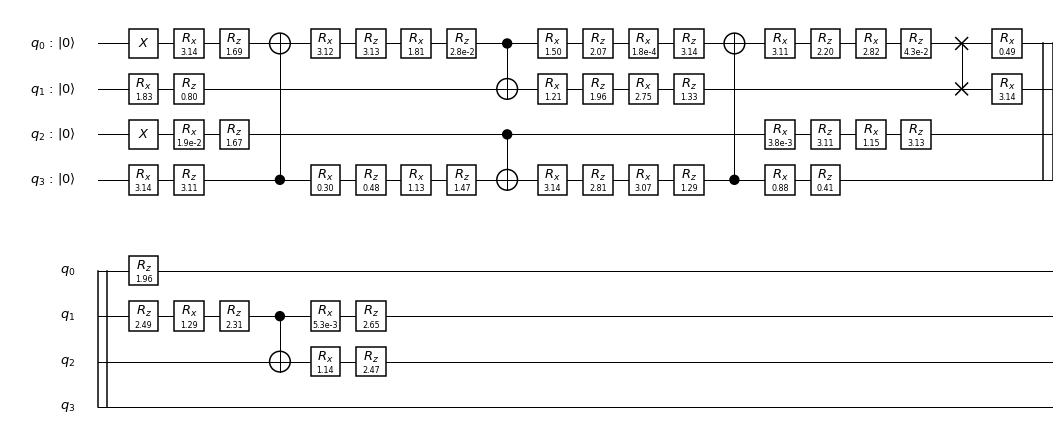

Best value is: -0.9362381673773141
Number of iterations is: 3


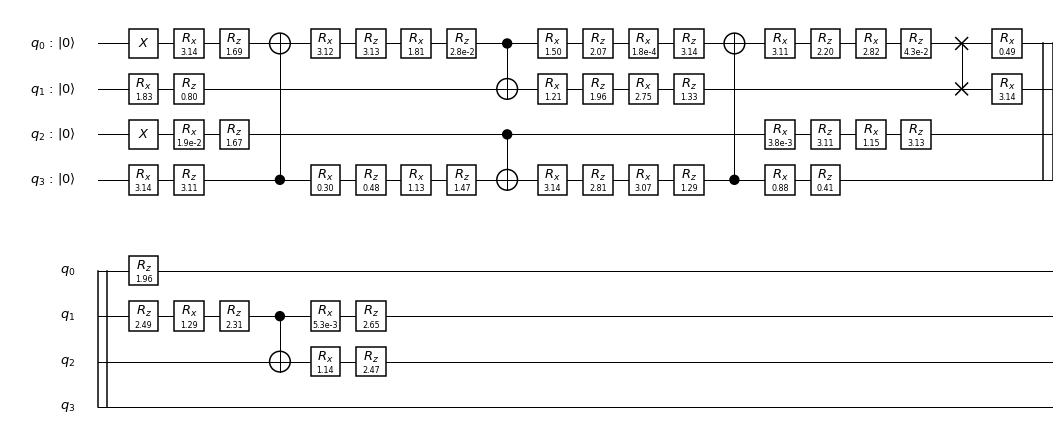

=== h2_2.5 ===
Minimal eigenvalue is  -0.9360549198442765
Initial state is 0101
Initial value: -0.931638219189628
Iteration #1 is finished, 8662 circuit evaluations performed
  Values: -0.9316388843605121, -0.9316368090997127, -0.9315994126013949, -0.9315959339442376!
  New value: -0.9316388843605121!


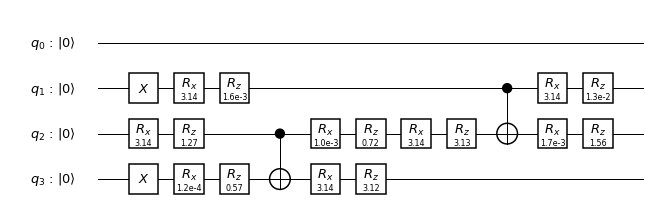

Iteration #2 is finished, 5968 circuit evaluations performed
  Values: -0.9316390827092325, -0.931634816723243, -0.9316327604993341, -0.9316318906496467!
  New value: -0.9316390827092325!


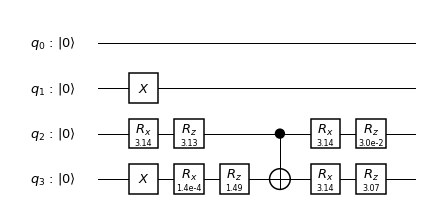

Iteration #3 is finished, 3805 circuit evaluations performed
  Values: -0.9316390867906645, -0.9316388580392791, -0.9316384574489898, -0.9316266386606489!
  New value: -0.9316390867906645!


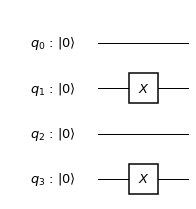

Iteration #4 is finished, 1981 circuit evaluations performed
  Values: -0.9316390867906645, -0.9316390863065845, -0.9316390862333083, -0.9316390842999331!
Iteration #5 is finished, 1861 circuit evaluations performed
  Values: -0.9316390867906645, -0.9316390801101855, -0.9316390800152601, -0.9316390696893647!
Iteration #6 is finished, 1970 circuit evaluations performed
  Values: -0.9316390843026435, -0.9316390728956974, -0.9316390057684448, -0.9316385486977949!
Iteration #7 is finished, 1891 circuit evaluations performed
  Values: -0.9316390867906645, -0.9316390857322919, -0.9316390737855091, -0.9316390730283618!
Iteration #8 is finished, 1042 circuit evaluations performed
  Values: -0.9316390867906645, -0.9316390867906645, -0.9316390867144431, -0.9316390731254937!
Iteration #9 is finished, 1651 circuit evaluations performed
  Values: -0.9316390867906645, -0.9316390411252433, -0.9316390400327431, -0.9316389057749075!
Iteration #10 is finished, 2820 circuit evaluations performed
  Values

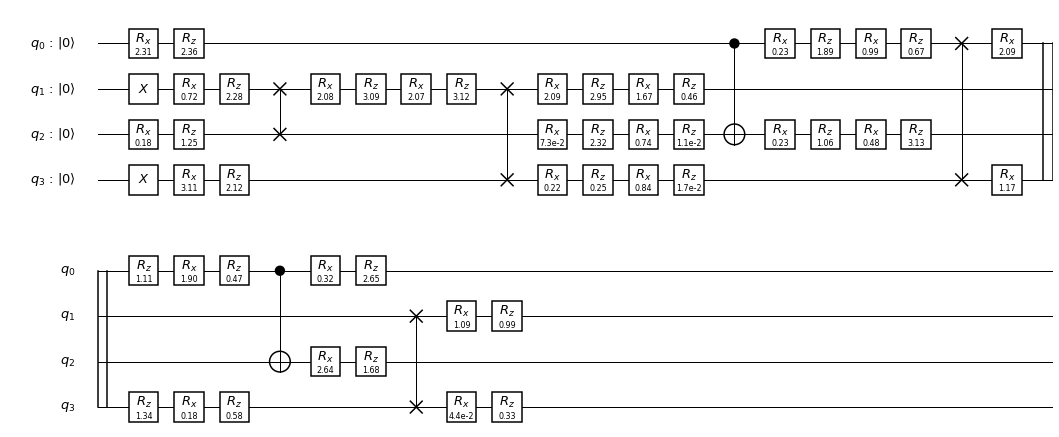

Iteration #15 is finished, 23853 circuit evaluations performed
  Values: -0.9354730771819547, -0.9331504655689243, -0.9315307440026558, -0.9314834471291661!
  New value: -0.9354730771819547!


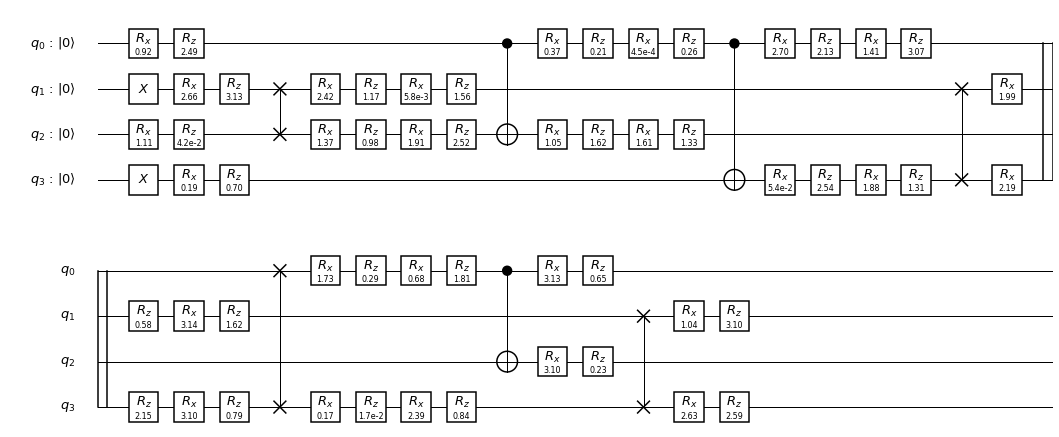

Best value is: -0.9354730771819547
Number of iterations is: 15


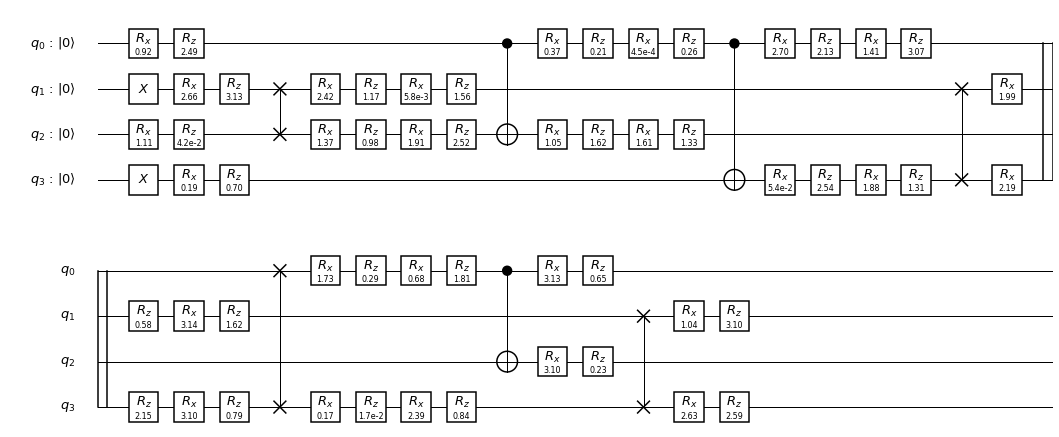

In [6]:
import numpy as np

rs = ['{:.1f}'.format(r) for r in np.arange(0.5, 2.6, 0.1)]
tasks = [(hamiltonians.q2, 'H2'), (hamiltonians.q4, 'LiH')] + [(hamiltonians.h2(r), 'h2_{}'.format(r)) for r in rs]
for task, task_name in tasks:
    print('=== {} ==='.format(task_name))
    report = run(task)
    rio.store('reports', task_name + "_swap", report)
    

In [16]:
from npq import N_from_qobj, expected_value, qobj_to_np, classical_state

for task, task_name in tasks:
    print(task.N)
    for i in range(2**4):
        print(expected_value(task.npH, classical_state(task.N, i)))

2
0.7561
0.5577
-1.1261
1.0027


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 5)